In [8]:
import pandas as pd
import numpy as np
from keras import Sequential
from keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [9]:
GOOGLE=False
DIRECTORY_GOOGLE = '/content/gdrive/My Drive/wolt/wolt/'
DIRECTORY = './'

if GOOGLE:
    DIRECTORY = DIRECTORY_GOOGLE
    from google.colab import drive
    drive.mount('/content/gdrive')

In [10]:
l = pd.read_csv(DIRECTORY+'locations.csv')
p = pd.read_csv(DIRECTORY+'pickup_times.csv')
p['date'] = pd.to_datetime(p['iso_8601_timestamp'])
p = p.drop(['iso_8601_timestamp'], axis=1)

In [5]:
dates = p[(p['date']> '2019-01-09 11:00:00') & (p['date']< '2019-01-09 12:00:00') & (p['location_id']==12)]

In [7]:
int(np.median(dates.sort_values(by=['pickup_time'])['pickup_time'].values))

27

In [46]:
len(dates)

1648

In [47]:
dates.sort_values(by=['pickup_time'])['pickup_time'].values[820:830]

array([24, 24, 24, 24, 24, 24, 24, 24, 24, 24])

location_id  pickup_time                date
2779            12           25 2019-01-09 11:46:05
2810            12           16 2019-01-09 11:41:43
6150            12           33 2019-01-09 11:07:23
7472            12           34 2019-01-09 11:21:41
16397           12           26 2019-01-09 11:07:08
16675           12           27 2019-01-09 11:02:34
19414           12           21 2019-01-09 11:48:21
26491           12           26 2019-01-09 11:32:06
27127           12           22 2019-01-09 11:33:22
31056           12           35 2019-01-09 11:29:44
31173           12           16 2019-01-09 11:41:05
32409           12           28 2019-01-09 11:47:02
40122           12           37 2019-01-09 11:38:01
42019           12           14 2019-01-09 11:56:00
42877           12           20 2019-01-09 11:48:10
53606           12           35 2019-01-09 11:40:55
54058           12           32 2019-01-09 11:40:02
56719           12           17 2019-01-09 11:52:37
58523           12           25 2019-01-09 11:48:09
60097           12           18 2019-01-09 11:08:14
61462           12           35 2019-01-09 11:37:06
61735           12           34 2019-01-09 11:27:13
63452           12           43 2019-01-09 11:25:41
63785           12           32 2019-01-09 11:30:31
64074           12           34 2019-01-09 11:22:35

In [11]:
p['date']> '2019-01-08 10:00:06'

0         True
1         True
2         True
3         True
4         True
5         True
6        False
7         True
8         True
9         True
10        True
11        True
12       False
13        True
14       False
15        True
16        True
17        True
18        True
19        True
20        True
21        True
22        True
23        True
24        True
25        True
26        True
27        True
28       False
29        True
         ...  
65350     True
65351     True
65352     True
65353     True
65354     True
65355    False
65356     True
65357     True
65358    False
65359    False
65360     True
65361     True
65362     True
65363     True
65364     True
65365    False
65366    False
65367     True
65368     True
65369     True
65370     True
65371     True
65372     True
65373     True
65374    False
65375     True
65376     True
65377    False
65378     True
65379     True
Name: date, Length: 65380, dtype: bool

In [12]:
p.head(10)

location_id  pickup_time                date
0            2           20 2019-01-13 19:32:53
1           55           37 2019-01-13 18:12:20
2           73           33 2019-01-10 18:13:26
3           46           33 2019-01-13 19:34:42
4           59           21 2019-01-08 16:11:42
5           30           27 2019-01-12 16:59:40
6           28           43 2019-01-07 18:39:47
7           51           11 2019-01-13 19:40:31
8           27           23 2019-01-08 10:24:19
9           35           14 2019-01-09 11:31:27

In [0]:
l.describe()

location_id  longitude   latitude
count    85.000000  85.000000  85.000000
mean     43.000000  24.936795  60.171424
std      24.681302   0.016679   0.010008
min       1.000000  24.876823  60.156714
25%      22.000000  24.931755  60.163782
50%      43.000000  24.938064  60.169055
75%      64.000000  24.946260  60.178490
max      85.000000  24.966130  60.199312

In [0]:
p.describe()

location_id   pickup_time
count  65380.000000  65380.000000
mean      41.056470     22.666886
std       24.739899      9.586789
min        1.000000      4.000000
25%       19.000000     15.000000
50%       39.000000     22.000000
75%       63.000000     29.000000
max       85.000000     65.000000

# NN

In [11]:
def prepare_date_for_nn(df_date):
    weekdays_one_hot_df = pd.get_dummies(df_date.map(lambda x: x.dayofweek))
    time_flat_series = df_date.map(lambda a: (a.hour-10)/10 + a.minute/600)
    weekdays_one_hot_df['time'] = time_flat_series
    return weekdays_one_hot_df
  
def prepare_for_nn(df):
    dates = prepare_date_for_nn(df['date'])
    places_dummies = pd.get_dummies(df['location_id'])
    return pd.concat([dates, places_dummies], axis=1).values, (df['pickup_time']/90).values

X, y = prepare_for_nn(p)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
def make_nn_model1():
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model2():
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model3():
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(300, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.4))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model
  
def make_nn_model4():
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(300, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model5():
    model = Sequential()
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(250, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(100, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model6():
    model = Sequential()
    model.add(Dense(140, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(140, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model7():
    model = Sequential()
    model.add(Dense(200, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(200, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model8():
    model = Sequential()
    model.add(Dense(130, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(130, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(130, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(150, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(130, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(130, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model9():
    model = Sequential()
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(124, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model10():
    model = Sequential()
    model.add(Dense(124, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(124, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model11():
    model = Sequential()
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(2048, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1024, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(124, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model12():
    model = Sequential()
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
#     model.add(Dense(300, kernel_initializer='normal', activation='selu'))
#     model.add(Dropout(0.2))
    model.add(Dense(256, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(124, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

def make_nn_model13():
    model = Sequential()
    model.add(Dense(1024, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(512, kernel_initializer='normal', activation='selu'))
    model.add(Dropout(0.2))
    model.add(Dense(1, kernel_initializer='normal', activation='sigmoid'))
    # Compile model
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse', 'mae', 'mape', 'cosine'])
    return model

In [13]:
def make_and_validate(maker, X, y, it=False):
    model = maker()
    val1 = 500
    val2 = 502
    X_test = X[val1:val2]
    history = []
    preds = []
    
    if it:
        history.append( model.fit(
            X, y,
            epochs=it, validation_split = 0.2, batch_size=256, verbose=1))
        print('finished ', it)
        return model, history, preds

    for i in [10, 40, 100, 150]:
        history.append( model.fit(
            X, y,
            epochs=i, validation_split = 0.2, batch_size=128, verbose=0))
        print('finished ', i)
    preds.append(model.predict(X_test)*90)
    return model, history, preds 

In [9]:
m1, h1, p1 = make_and_validate(make_nn_model1, X, y)
m2, h2, p2 = make_and_validate(make_nn_model2, X, y)
m3, h3, p3 = make_and_validate(make_nn_model3, X, y)
m4, h4, p4 = make_and_validate(make_nn_model4, X, y)

# print("\n \
# Should be: {} \n\
# Result1:  {} \n\
# Result2:  {} \n\
# Result3:  {} \n\
# Result4:  {} \n\
# Result5:  {} \n\
# Result6:  {} \n\
# Result7:  {} \n\
# Result8:  {} \n\
# Result9:  {} \n\
# Result10: {} \n\
# Result11: {} \n\
# Result12: {} \n\
# ".format(y[val1:val2],preds1,preds2,preds3,preds4,preds5,preds6,preds7,preds8,preds9,preds10,preds11,preds12), file=open(DIRECTORY+"output.txt", "a"))

Train on 52304 samples, validate on 13076 samples
Epoch 1/10
52304/52304 [==============================] - 2s 44us/step - loss: 0.0108 - mean_squared_error: 0.0108 - mean_absolute_error: 0.0840 - mean_absolute_percentage_error: 44.3814 - cosine_proximity: -1.0000 - val_loss: 0.0095 - val_mean_squared_error: 0.0095 - val_mean_absolute_error: 0.0805 - val_mean_absolute_percentage_error: 45.5318 - val_cosine_proximity: -1.0000
Epoch 2/10
52304/52304 [==============================] - 2s 36us/step - loss: 0.0097 - mean_squared_error: 0.0097 - mean_absolute_error: 0.0804 - mean_absolute_percentage_error: 42.5462 - cosine_proximity: -1.0000 - val_loss: 0.0092 - val_mean_squared_error: 0.0092 - val_mean_absolute_error: 0.0787 - val_mean_absolute_percentage_error: 43.6053 - val_cosine_proximity: -1.0000
Epoch 3/10
52304/52304 [==============================] - 2s 36us/step - loss: 0.0094 - mean_squared_error: 0.0094 - mean_absolute_error: 0.0791 - mean_absolute_percentage_error: 41.8918 - cos

Epoch 34/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.8594 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 37.4224 - val_cosine_proximity: -1.0000
Epoch 35/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.9102 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 34.1785 - val_cosine_proximity: -1.0000
Epoch 36/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.8336 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val

52304/52304 [==============================] - 2s 36us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 36.0961 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 33.7853 - val_cosine_proximity: -1.0000
Epoch 37/100
52304/52304 [==============================] - 2s 36us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 35.9602 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0696 - val_mean_absolute_percentage_error: 34.7570 - val_cosine_proximity: -1.0000
Epoch 38/100
52304/52304 [==============================] - 2s 36us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 35.9376 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5454 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 35.5923 - val_cosine_proximity: -1.0000
Epoch 79/100
52304/52304 [==============================] - 2s 36us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.5058 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 34.1879 - val_cosine_proximity: -1.0000
Epoch 80/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5530 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.2940 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 33.7759 - val_cosine_proximity: -1.0000
Epoch 21/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.2843 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.8554 - val_cosine_proximity: -1.0000
Epoch 22/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.2350 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 34.9312 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 33.8610 - val_cosine_proximity: -1.0000
Epoch 63/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.0848 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 35.8519 - val_cosine_proximity: -1.0000
Epoch 64/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 35.0115 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.8520 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 35.7104 - val_cosine_proximity: -1.0000
Epoch 105/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.9000 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 35.8444 - val_cosine_proximity: -1.0000
Epoch 106/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.8878 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.7844 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0682 - val_mean_absolute_percentage_error: 33.6307 - val_cosine_proximity: -1.0000
Epoch 147/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.7405 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 36.5058 - val_cosine_proximity: -1.0000
Epoch 148/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.8333 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

Epoch 29/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 37.8000 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0723 - val_mean_absolute_percentage_error: 39.1998 - val_cosine_proximity: -1.0000
Epoch 30/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.6842 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0719 - val_mean_absolute_percentage_error: 38.0913 - val_cosine_proximity: -1.0000
Epoch 31/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.6803 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val

52304/52304 [==============================] - 2s 37us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.3478 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 34.8383 - val_cosine_proximity: -1.0000
Epoch 32/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.3137 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0708 - val_mean_absolute_percentage_error: 35.9137 - val_cosine_proximity: -1.0000
Epoch 33/100
52304/52304 [==============================] - 2s 36us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.2215 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.9476 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 37.4292 - val_cosine_proximity: -1.0000
Epoch 74/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 37.0155 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0710 - val_mean_absolute_percentage_error: 36.6514 - val_cosine_proximity: -1.0000
Epoch 75/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.0762 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.8484 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 35.9494 - val_cosine_proximity: -1.0000
Epoch 16/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.9094 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 35.9358 - val_cosine_proximity: -1.0000
Epoch 17/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.7866 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 36.8031 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0705 - val_mean_absolute_percentage_error: 35.5203 - val_cosine_proximity: -1.0000
Epoch 58/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.7465 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 36.3825 - val_cosine_proximity: -1.0000
Epoch 59/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.6996 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.6017 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 34.8097 - val_cosine_proximity: -1.0000
Epoch 100/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.6956 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 34.6604 - val_cosine_proximity: -1.0000
Epoch 101/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.6870 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_sq

52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.6633 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 37.9089 - val_cosine_proximity: -1.0000
Epoch 142/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.5329 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0708 - val_mean_absolute_percentage_error: 33.8031 - val_cosine_proximity: -1.0000
Epoch 143/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.6142 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_sq

Epoch 24/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 37.9940 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 35.9781 - val_cosine_proximity: -1.0000
Epoch 25/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 38.0489 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 38.5499 - val_cosine_proximity: -1.0000
Epoch 26/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 37.9840 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val

52304/52304 [==============================] - 2s 41us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.6010 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 34.8611 - val_cosine_proximity: -1.0000
Epoch 27/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.5778 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0708 - val_mean_absolute_percentage_error: 36.4615 - val_cosine_proximity: -1.0000
Epoch 28/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.4746 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.4966 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0714 - val_mean_absolute_percentage_error: 38.0676 - val_cosine_proximity: -1.0000
Epoch 69/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.4130 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 33.9766 - val_cosine_proximity: -1.0000
Epoch 70/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.3106 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.2369 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 37.7511 - val_cosine_proximity: -1.0000
Epoch 11/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 37.1736 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 34.7630 - val_cosine_proximity: -1.0000
Epoch 12/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.2551 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.1044 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 35.8201 - val_cosine_proximity: -1.0000
Epoch 53/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.0695 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0710 - val_mean_absolute_percentage_error: 33.4753 - val_cosine_proximity: -1.0000
Epoch 54/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.0892 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 37.1270 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 35.6994 - val_cosine_proximity: -1.0000
Epoch 95/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.9563 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 35.5077 - val_cosine_proximity: -1.0000
Epoch 96/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 36.9688 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.9357 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0706 - val_mean_absolute_percentage_error: 37.2489 - val_cosine_proximity: -1.0000
Epoch 137/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.8373 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 36.7973 - val_cosine_proximity: -1.0000
Epoch 138/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.9056 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_sq

52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.2902 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 35.5102 - val_cosine_proximity: -1.0000
Epoch 19/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.3201 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 35.9967 - val_cosine_proximity: -1.0000
Epoch 20/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 37.2543 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_square

Epoch 40/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.7310 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 33.6311 - val_cosine_proximity: -1.0000
Train on 52304 samples, validate on 13076 samples
Epoch 1/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.6689 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0706 - val_mean_absolute_percentage_error: 37.0795 - val_cosine_proximity: -1.0000
Epoch 2/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 36.5931 - 

52304/52304 [==============================] - 2s 41us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 35.9365 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 38.2651 - val_cosine_proximity: -1.0000
Epoch 43/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.8564 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 34.3810 - val_cosine_proximity: -1.0000
Epoch 44/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8524 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5828 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 33.7621 - val_cosine_proximity: -1.0000
Epoch 85/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 35.4537 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0690 - val_mean_absolute_percentage_error: 34.2847 - val_cosine_proximity: -1.0000
Epoch 86/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4540 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 35.1645 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 35.2079 - val_cosine_proximity: -1.0000
Epoch 27/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.1069 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 34.1594 - val_cosine_proximity: -1.0000
Epoch 28/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.1785 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squa

52304/52304 [==============================] - 2s 42us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 34.9964 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.9802 - val_cosine_proximity: -1.0000
Epoch 69/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 35.1420 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 34.3599 - val_cosine_proximity: -1.0000
Epoch 70/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 34.9925 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.8622 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 36.0459 - val_cosine_proximity: -1.0000
Epoch 111/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.7924 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 36.1361 - val_cosine_proximity: -1.0000
Epoch 112/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.7681 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

In [58]:
m5, h5, p5 = make_and_validate(make_nn_model5, X, y)
m6, h6, p6 = make_and_validate(make_nn_model6, X, y)
m7, h7, p7 = make_and_validate(make_nn_model7, X, y)
m8, h8, p8 = make_and_validate(make_nn_model8, X, y)

Train on 52304 samples, validate on 13076 samples
Epoch 1/10
52304/52304 [==============================] - 2s 46us/step - loss: 0.0109 - mean_squared_error: 0.0109 - mean_absolute_error: 0.0844 - mean_absolute_percentage_error: 44.7474 - cosine_proximity: -1.0000 - val_loss: 0.0094 - val_mean_squared_error: 0.0094 - val_mean_absolute_error: 0.0784 - val_mean_absolute_percentage_error: 39.2321 - val_cosine_proximity: -1.0000
Epoch 2/10
52304/52304 [==============================] - 2s 33us/step - loss: 0.0097 - mean_squared_error: 0.0097 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 42.4996 - cosine_proximity: -1.0000 - val_loss: 0.0092 - val_mean_squared_error: 0.0092 - val_mean_absolute_error: 0.0774 - val_mean_absolute_percentage_error: 38.8557 - val_cosine_proximity: -1.0000
Epoch 3/10
52304/52304 [==============================] - 2s 34us/step - loss: 0.0094 - mean_squared_error: 0.0094 - mean_absolute_error: 0.0793 - mean_absolute_percentage_error: 41.9534 - cos

Epoch 34/40
52304/52304 [==============================] - 2s 33us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.3141 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0719 - val_mean_absolute_percentage_error: 36.4747 - val_cosine_proximity: -1.0000
Epoch 35/40
52304/52304 [==============================] - 2s 33us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.1833 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0728 - val_mean_absolute_percentage_error: 37.9730 - val_cosine_proximity: -1.0000
Epoch 36/40
52304/52304 [==============================] - 2s 33us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.1377 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val

52304/52304 [==============================] - 2s 33us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.8466 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 37.0244 - val_cosine_proximity: -1.0000
Epoch 37/100
52304/52304 [==============================] - 2s 32us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.8759 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 35.6255 - val_cosine_proximity: -1.0000
Epoch 38/100
52304/52304 [==============================] - 2s 33us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.8634 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 33us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 36.2896 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0698 - val_mean_absolute_percentage_error: 36.0025 - val_cosine_proximity: -1.0000
Epoch 79/100
52304/52304 [==============================] - 2s 33us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 36.2473 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 35.5815 - val_cosine_proximity: -1.0000
Epoch 80/100
52304/52304 [==============================] - 2s 33us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 36.2638 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 2s 33us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 35.9618 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 35.9263 - val_cosine_proximity: -1.0000
Epoch 21/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8680 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0698 - val_mean_absolute_percentage_error: 34.8580 - val_cosine_proximity: -1.0000
Epoch 22/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 35.9524 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 33us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5780 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 36.9470 - val_cosine_proximity: -1.0000
Epoch 63/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.6597 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0706 - val_mean_absolute_percentage_error: 37.0674 - val_cosine_proximity: -1.0000
Epoch 64/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5357 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 33us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4975 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 34.9360 - val_cosine_proximity: -1.0000
Epoch 105/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5027 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 37.6777 - val_cosine_proximity: -1.0000
Epoch 106/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4636 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_sq

52304/52304 [==============================] - 2s 33us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.3285 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 34.4172 - val_cosine_proximity: -1.0000
Epoch 147/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.2785 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0708 - val_mean_absolute_percentage_error: 37.9027 - val_cosine_proximity: -1.0000
Epoch 148/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3426 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_sq

Epoch 29/40
52304/52304 [==============================] - 2s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 39.1701 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0738 - val_mean_absolute_percentage_error: 38.7135 - val_cosine_proximity: -1.0000
Epoch 30/40
52304/52304 [==============================] - 2s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 39.1164 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0746 - val_mean_absolute_percentage_error: 40.0906 - val_cosine_proximity: -1.0000
Epoch 31/40
52304/52304 [==============================] - 2s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.1761 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val

52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 38.7408 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0731 - val_mean_absolute_percentage_error: 38.2576 - val_cosine_proximity: -1.0000
Epoch 32/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 38.6902 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0729 - val_mean_absolute_percentage_error: 36.2367 - val_cosine_proximity: -1.0000
Epoch 33/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0742 - mean_absolute_percentage_error: 38.7368 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 38.4965 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0730 - val_mean_absolute_percentage_error: 37.3743 - val_cosine_proximity: -1.0000
Epoch 74/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 38.4105 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0729 - val_mean_absolute_percentage_error: 38.5156 - val_cosine_proximity: -1.0000
Epoch 75/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.3270 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.2531 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0723 - val_mean_absolute_percentage_error: 36.8053 - val_cosine_proximity: -1.0000
Epoch 16/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.2511 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0728 - val_mean_absolute_percentage_error: 38.5609 - val_cosine_proximity: -1.0000
Epoch 17/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 38.2652 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.2340 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0734 - val_mean_absolute_percentage_error: 38.1659 - val_cosine_proximity: -1.0000
Epoch 58/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.1418 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0724 - val_mean_absolute_percentage_error: 37.7938 - val_cosine_proximity: -1.0000
Epoch 59/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 38.1290 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 38.0689 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 36.8125 - val_cosine_proximity: -1.0000
Epoch 100/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0223 - cosine_proximity: -1.0000 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0752 - val_mean_absolute_percentage_error: 39.8871 - val_cosine_proximity: -1.0000
Epoch 101/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0708 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_sq

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 38.0169 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0722 - val_mean_absolute_percentage_error: 37.3837 - val_cosine_proximity: -1.0000
Epoch 142/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.9366 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 38.4180 - val_cosine_proximity: -1.0000
Epoch 143/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.9553 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_sq

Epoch 24/40
52304/52304 [==============================] - 2s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.1273 - cosine_proximity: -1.0000 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0749 - val_mean_absolute_percentage_error: 39.4434 - val_cosine_proximity: -1.0000
Epoch 25/40
52304/52304 [==============================] - 1s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.1451 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0740 - val_mean_absolute_percentage_error: 38.3404 - val_cosine_proximity: -1.0000
Epoch 26/40
52304/52304 [==============================] - 2s 29us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.0860 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val

52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 38.5792 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0738 - val_mean_absolute_percentage_error: 39.4234 - val_cosine_proximity: -1.0000
Epoch 27/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 38.5695 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0737 - val_mean_absolute_percentage_error: 37.5189 - val_cosine_proximity: -1.0000
Epoch 28/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 38.5111 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 38.3583 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0734 - val_mean_absolute_percentage_error: 38.6108 - val_cosine_proximity: -1.0000
Epoch 69/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 38.2736 - cosine_proximity: -1.0000 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0740 - val_mean_absolute_percentage_error: 39.0902 - val_cosine_proximity: -1.0000
Epoch 70/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.2875 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.1530 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0723 - val_mean_absolute_percentage_error: 37.5401 - val_cosine_proximity: -1.0000
Epoch 11/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0695 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0728 - val_mean_absolute_percentage_error: 37.3000 - val_cosine_proximity: -1.0000
Epoch 12/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0681 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 38.0599 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0730 - val_mean_absolute_percentage_error: 36.7611 - val_cosine_proximity: -1.0000
Epoch 53/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.1381 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 37.5474 - val_cosine_proximity: -1.0000
Epoch 54/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 38.0602 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.9132 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0727 - val_mean_absolute_percentage_error: 38.5328 - val_cosine_proximity: -1.0000
Epoch 95/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 38.0312 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0734 - val_mean_absolute_percentage_error: 36.8761 - val_cosine_proximity: -1.0000
Epoch 96/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.9740 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.8983 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0722 - val_mean_absolute_percentage_error: 37.7990 - val_cosine_proximity: -1.0000
Epoch 137/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.8155 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0736 - val_mean_absolute_percentage_error: 37.6636 - val_cosine_proximity: -1.0000
Epoch 138/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.9219 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_sq

52304/52304 [==============================] - 2s 47us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.8245 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 37.2259 - val_cosine_proximity: -1.0000
Epoch 19/40
52304/52304 [==============================] - 2s 47us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.7766 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 36.5366 - val_cosine_proximity: -1.0000
Epoch 20/40
52304/52304 [==============================] - 2s 47us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.6346 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_square

Epoch 40/40
52304/52304 [==============================] - 2s 46us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.8701 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 37.0451 - val_cosine_proximity: -1.0000
Train on 52304 samples, validate on 13076 samples
Epoch 1/100
52304/52304 [==============================] - 2s 47us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.8455 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 35.5707 - val_cosine_proximity: -1.0000
Epoch 2/100
52304/52304 [==============================] - 2s 46us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.8630 - 

52304/52304 [==============================] - 2s 46us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 36.2625 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 35.9940 - val_cosine_proximity: -1.0000
Epoch 43/100
52304/52304 [==============================] - 2s 46us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 36.2059 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0705 - val_mean_absolute_percentage_error: 37.0912 - val_cosine_proximity: -1.0000
Epoch 44/100
52304/52304 [==============================] - 2s 46us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0709 - mean_absolute_percentage_error: 36.1801 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squa

52304/52304 [==============================] - 2s 45us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.8490 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 36.3193 - val_cosine_proximity: -1.0000
Epoch 85/100
52304/52304 [==============================] - 2s 46us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 36.0010 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 34.1328 - val_cosine_proximity: -1.0000
Epoch 86/100
52304/52304 [==============================] - 2s 46us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8439 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 46us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.7495 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 35.8836 - val_cosine_proximity: -1.0000
Epoch 27/150
52304/52304 [==============================] - 2s 47us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5761 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 35.5831 - val_cosine_proximity: -1.0000
Epoch 28/150
52304/52304 [==============================] - 2s 46us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5325 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 46us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.3340 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.4734 - val_cosine_proximity: -1.0000
Epoch 69/150
52304/52304 [==============================] - 2s 47us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3622 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 35.0330 - val_cosine_proximity: -1.0000
Epoch 70/150
52304/52304 [==============================] - 2s 47us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.3161 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 46us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.2539 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 34.2072 - val_cosine_proximity: -1.0000
Epoch 111/150
52304/52304 [==============================] - 2s 46us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.2594 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 33.4898 - val_cosine_proximity: -1.0000
Epoch 112/150
52304/52304 [==============================] - 2s 45us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.1141 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_sq

In [ ]:
m9, h9, p9 = make_and_validate(make_nn_model9, X, y)
m10, h10, p10 = make_and_validate(make_nn_model10, X, y)
m11, h11, p11 = make_and_validate(make_nn_model11, X, y)
m12, h12, p12 = make_and_validate(make_nn_model12, X, y)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
finished  10
finished  40


In [187]:
def visualize_history(history):
    # Plot training & validation accuracy values
    plt.plot(history.history['mean_absolute_error'])
    plt.plot(history.history['val_mean_absolute_error'])
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
def visualize_history_more(history):
    # Plot training & validation accuracy values
    mse=[]
    vmse=[]
    loss=[]
    vloss=[]
    for h in history:
        mse+= h.history['mean_absolute_error']
        vmse+= h.history['val_mean_absolute_error']
        loss+= h.history['loss']
        vloss+= h.history['val_loss']
    
    plt.plot(mse)
    plt.plot(vmse)
    plt.title('Model MAE')
    plt.ylabel('MAE')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()

    # Plot training & validation loss values
    plt.plot(loss)
    plt.plot(vloss)
    plt.title('Model loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Test'], loc='upper left')
    plt.show()
    
# pyplot.plot(history.history['mean_squared_error'])
# pyplot.plot(history.history['mean_absolute_error'])
# pyplot.plot(history.history['mean_absolute_percentage_error'])
# pyplot.plot(history.history['cosine_proximity'])

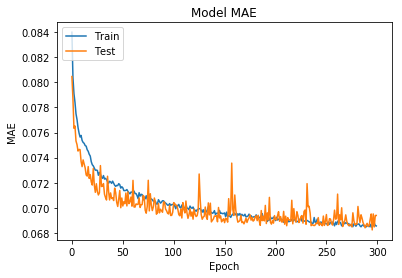

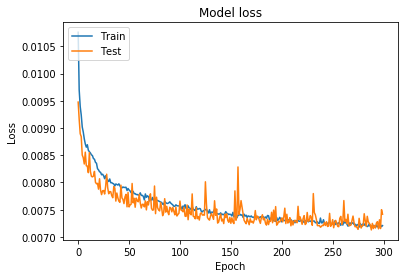

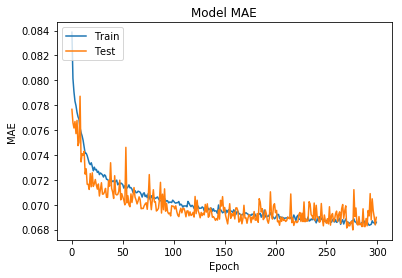

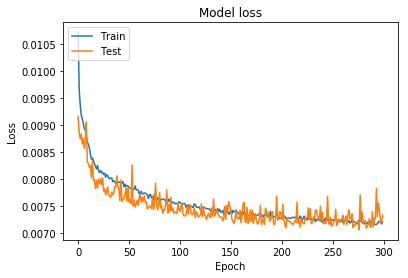

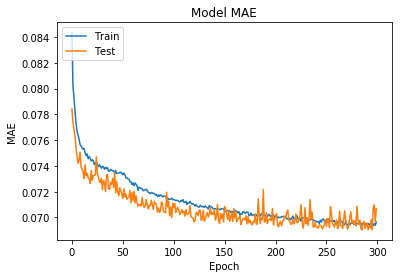

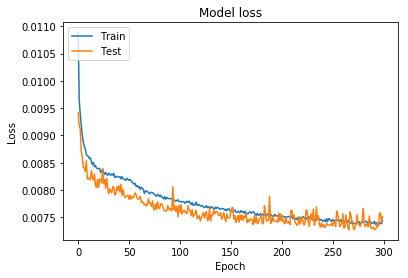

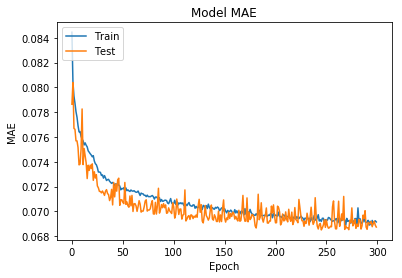

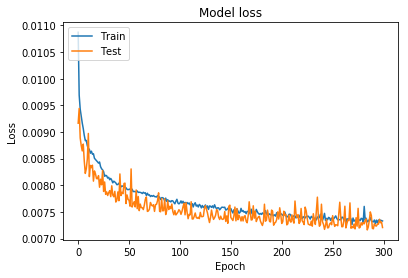

In [60]:
visualize_history_more(h1)
visualize_history_more(h4)
visualize_history_more(h5)
# visualize_history_more(h6)
# visualize_history_more(h7)
visualize_history_more(h8)

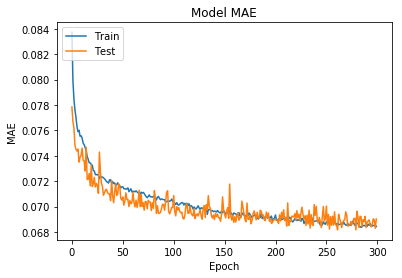

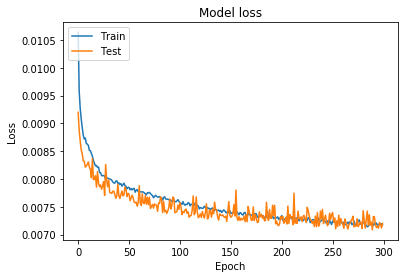

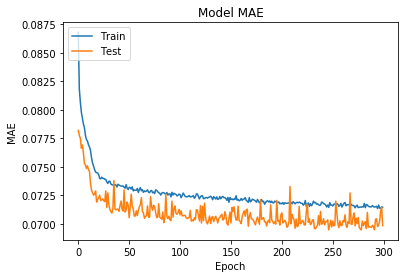

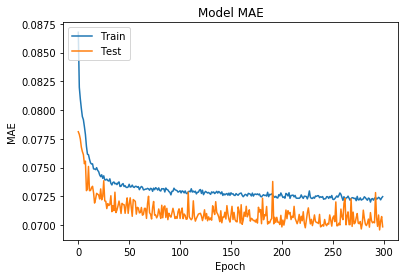

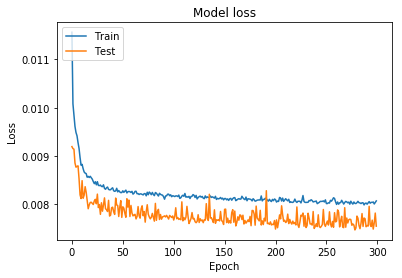

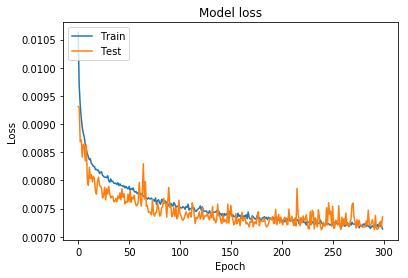

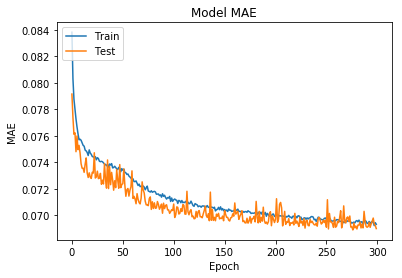

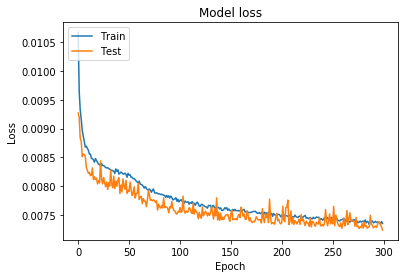

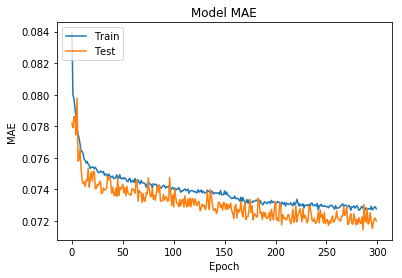

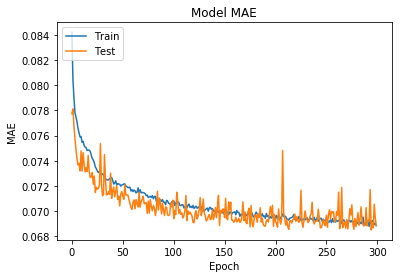

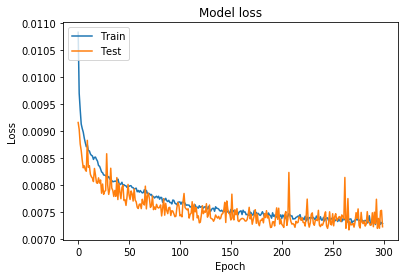

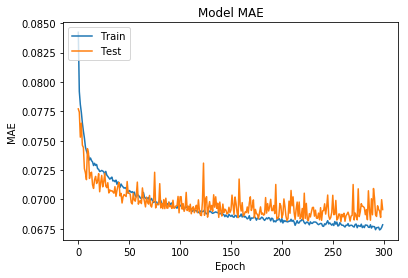

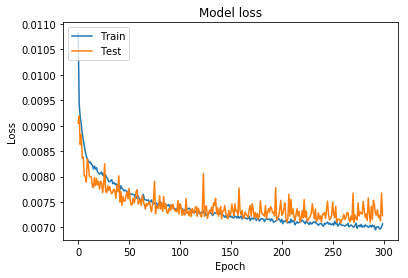

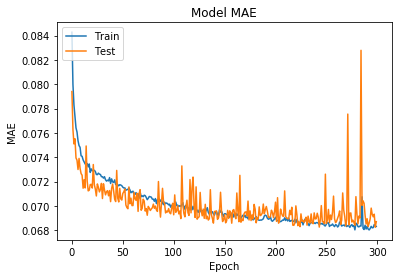

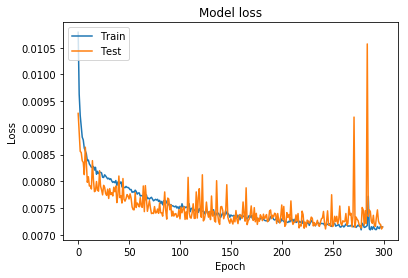

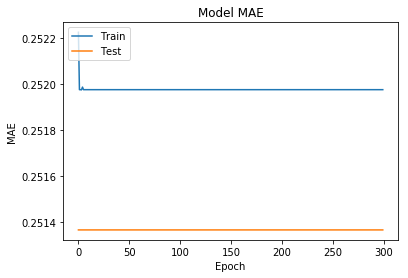

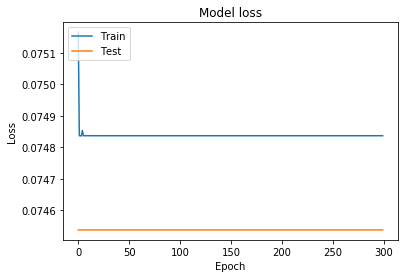

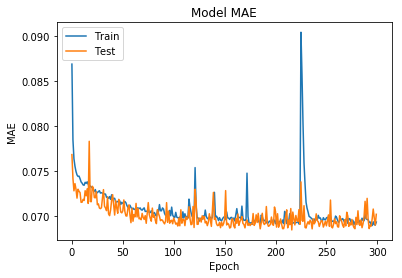

In [191]:
visualize_history_more(h1)
visualize_history_more(h2)
visualize_history_more(h3)
visualize_history_more(h4)
visualize_history_more(h5)
visualize_history_more(h6)
visualize_history_more(h7)
visualize_history_more(h8)
visualize_history_more(h9)
visualize_history_more(h10)
visualize_history_more(h11)
visualize_history_more(h12)

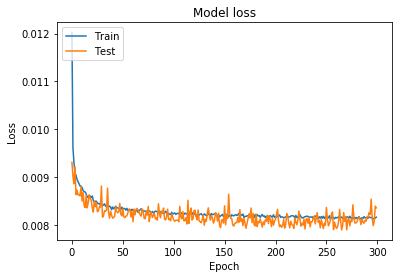

In [202]:
visualize_history_more(h13)

In [99]:
(m2.predict(X[0:510])*90).shape

(10, 1)

In [101]:
(y[500:510]*90).shape

(10,)

1


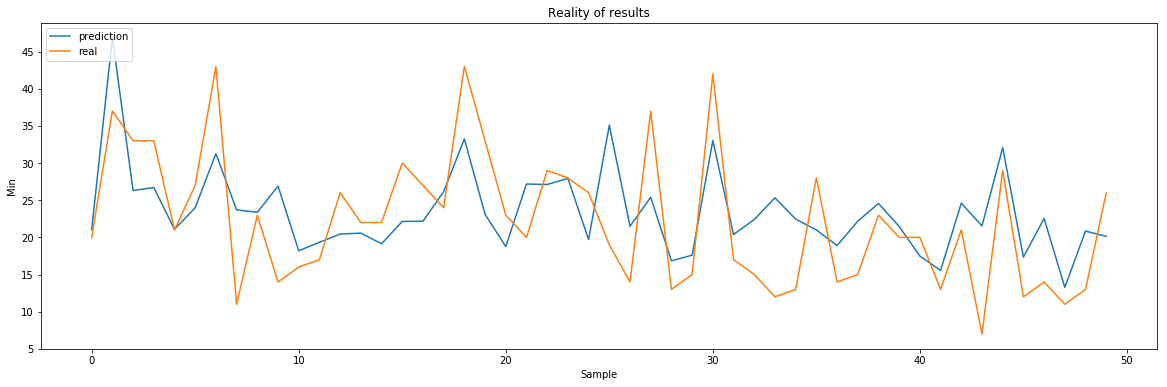

2


3


4


5


6


7


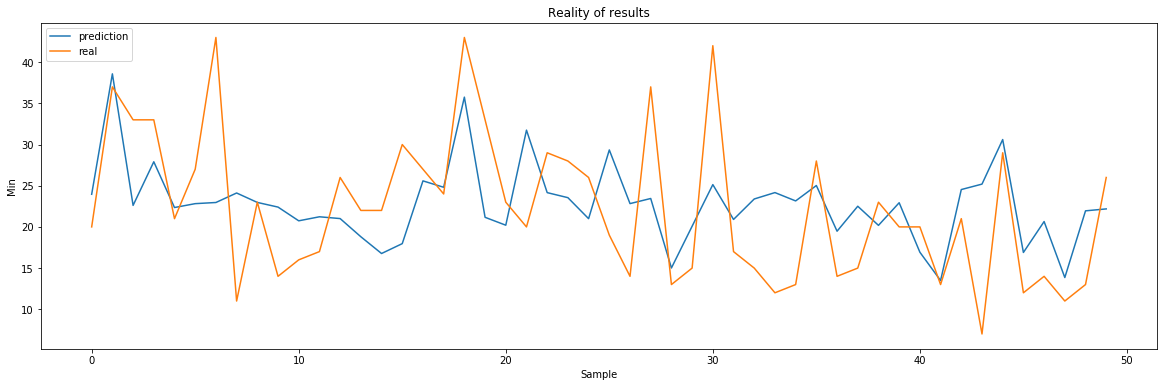

8


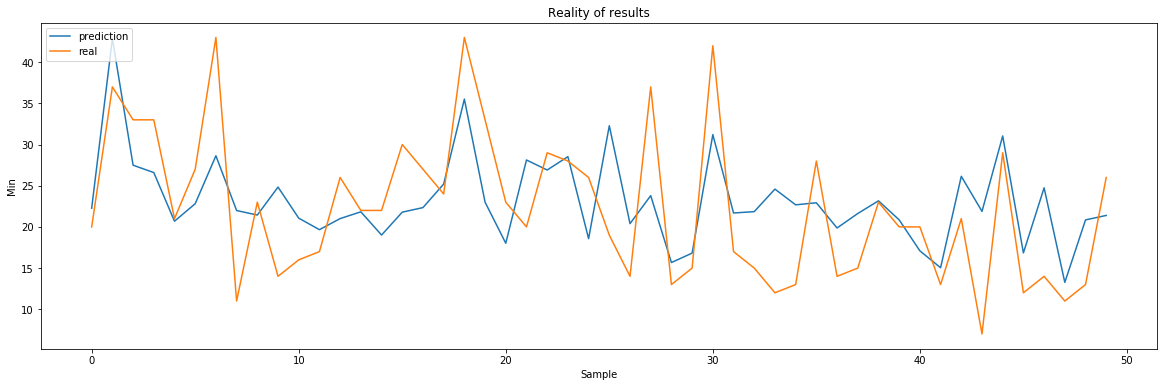

9


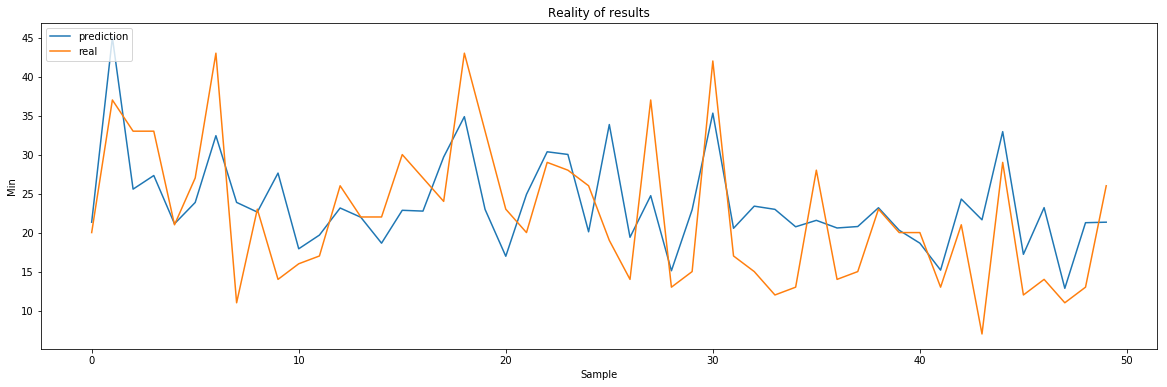

10


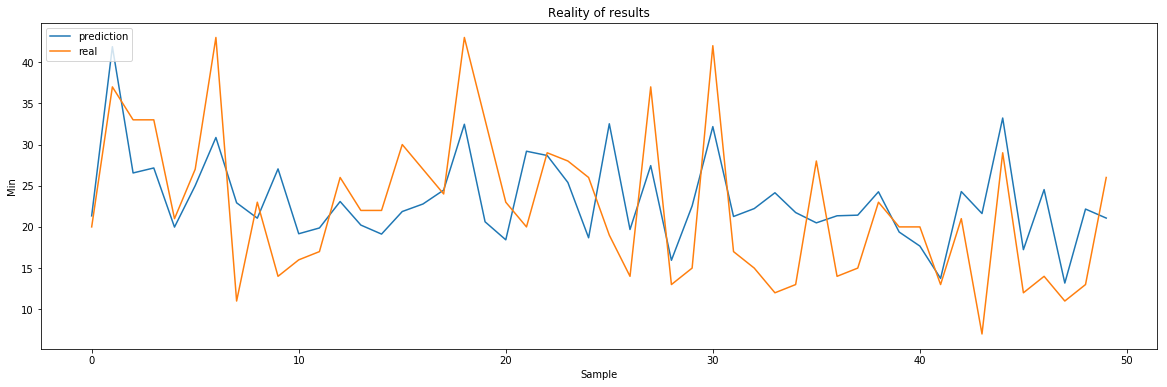

11


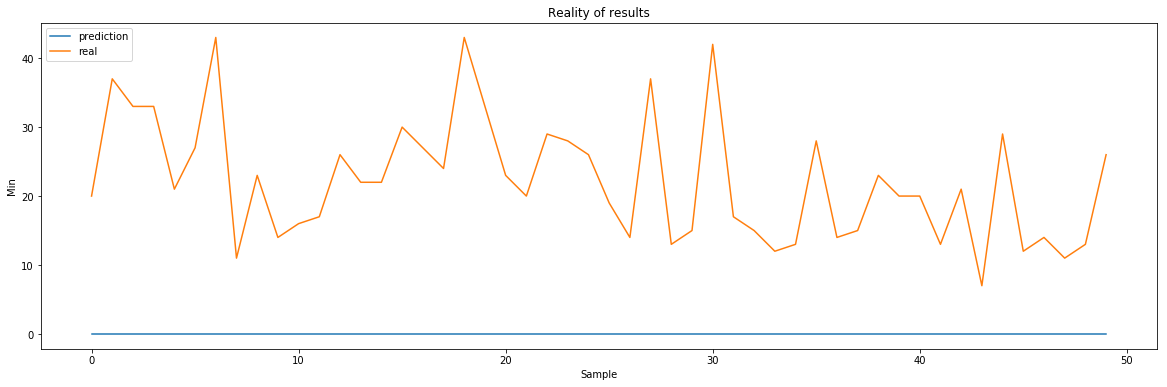

12


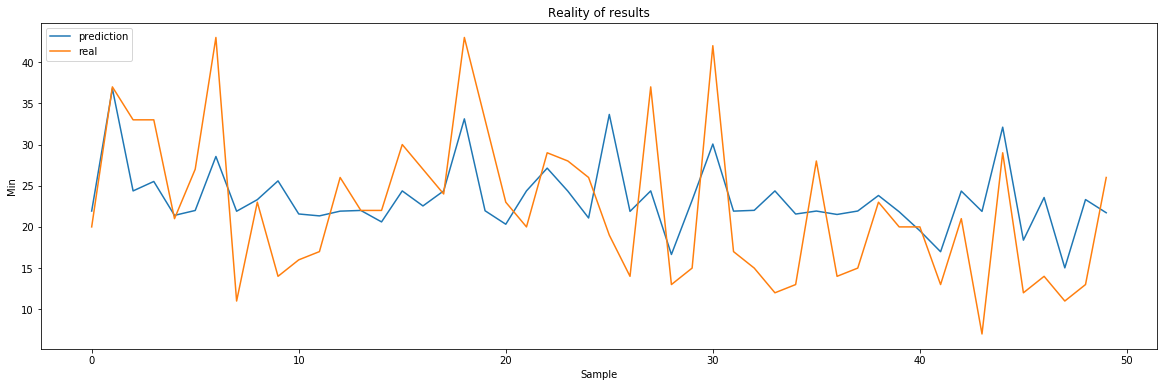

In [189]:
S=0
E=50
i=0
for m in [m1, m2, m3, m4, m5, m6, m7, m8, m9, m10, m11, m12 ]:
    i+=1
    print(i)
    
    plt.figure(figsize=(20,6))
    plt.plot(m.predict(X[S:E])*90)
    plt.plot(y[S:E]*90)
    plt.title('Reality of results')
    plt.ylabel('Min')
    plt.xlabel('Sample')
    plt.legend(['prediction', 'real'], loc='upper left')
    plt.show()

## NN with GPS

In [63]:
from sklearn.preprocessing import MinMaxScaler
import folium

In [197]:
def prep_gps(p, l):
    lalo = l.iloc[:,2:0:-1]
    s = MinMaxScaler()
    s.fit_transform(lalo)

    lats, longs = [], []
    for r in p.itertuples():
        lats.append(lalo['latitude'][r[1]-1])
        longs.append(lalo['longitude'][r[1]-1])

    p['latitude'] = lats
    p['longitude'] = longs

    return s.transform(p.iloc[:,3:])

def prepare_date_for_nn(df_date):
    weekdays_one_hot_df = pd.get_dummies(df_date.map(lambda x: x.dayofweek))
    time_flat_series = df_date.map(lambda a: (a.hour-10)/10 + a.minute/600)
    weekdays_one_hot_df['time'] = time_flat_series
    return weekdays_one_hot_df
  
def prepare_for_nn(df):
    dates = prepare_date_for_nn(df['date'])
    places_dummies = pd.get_dummies(df['location_id'])
    t_la_lo = prep_gps(df, l)
    
    
    return pd.concat([dates, places_dummies, pd.DataFrame(t_la_lo)], axis=1).values, (df['pickup_time']/90).values

X, y = prepare_for_nn(p)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [198]:
lo, la = l['longitude'].values, l['latitude'].values
la.mean(), lo.mean()

(60.17142350588235, 24.93679454117647)

In [64]:
lo, la = l['longitude'].values, l['latitude'].values
mean_gps = [la.mean(), lo.mean()]
map_ = folium.Map(location=mean_gps, zoom_start=12)
for r in l.iloc[:,1:3].itertuples():
    folium.Marker([r[2],r[1]]).add_to(map_)
folium.Marker(mean_gps).add_to(map_)
map_

In [183]:
m1, h1, p1 = make_and_validate(make_nn_model1, X, y)
m2, h2, p2 = make_and_validate(make_nn_model2, X, y)
m3, h3, p3 = make_and_validate(make_nn_model3, X, y)
m4, h4, p4 = make_and_validate(make_nn_model4, X, y)
m5, h5, p5 = make_and_validate(make_nn_model5, X, y)
m6, h6, p6 = make_and_validate(make_nn_model6, X, y)
m7, h7, p7 = make_and_validate(make_nn_model7, X, y)
m8, h8, p8 = make_and_validate(make_nn_model8, X, y)
m9, h9, p9 = make_and_validate(make_nn_model9, X, y)
m10, h10, p10 = make_and_validate(make_nn_model10, X, y)
m11, h11, p11 = make_and_validate(make_nn_model11, X, y)
m12, h12, p12 = make_and_validate(make_nn_model12, X, y)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 52304 samples, validate on 13076 samples
Epoch 1/10
52304/52304 [==============================] - 3s 58us/step - loss: 0.0106 - mean_squared_error: 0.0106 - mean_absolute_error: 0.0837 - mean_absolute_percentage_error: 44.2526 - cosine_proximity: -1.0000 - val_loss: 0.0092 - val_mean_squared_error: 0.0092 - val_mean_absolute_error: 0.0778 - val_mean_absolute_percentage_error: 39.9193 - val_cosine_proximity: -1.0000
Epoch 2/10
52304/52304 [==============================] - 2s 36us/step - loss: 0.0096 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0799 - mean_absolute_percentage_error: 42.1840 - cosine_proximity: -1.0000 - val_loss: 0.0089 - val_mean_squared_error: 0.0089 - val_mean_absolute_error: 0.0767 - val_mean_absolute_percentage_erro

Epoch 10/40
52304/52304 [==============================] - 2s 37us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.9173 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0733 - val_mean_absolute_percentage_error: 39.5847 - val_cosine_proximity: -1.0000
Epoch 11/40
52304/52304 [==============================] - 2s 37us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.8094 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 35.5878 - val_cosine_proximity: -1.0000
Epoch 12/40
52304/52304 [==============================] - 2s 37us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.6188 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val

Epoch 32/40
52304/52304 [==============================] - 2s 36us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.8237 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 35.0585 - val_cosine_proximity: -1.0000
Epoch 33/40
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.8703 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 37.1298 - val_cosine_proximity: -1.0000
Epoch 34/40
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.7501 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val

52304/52304 [==============================] - 2s 36us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 36.0118 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 35.2102 - val_cosine_proximity: -1.0000
Epoch 35/100
52304/52304 [==============================] - 2s 36us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 36.0735 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 34.0775 - val_cosine_proximity: -1.0000
Epoch 36/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 36.1874 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.6244 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 34.6860 - val_cosine_proximity: -1.0000
Epoch 77/100
52304/52304 [==============================] - 2s 38us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.4966 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0698 - val_mean_absolute_percentage_error: 33.4052 - val_cosine_proximity: -1.0000
Epoch 78/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5754 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.2545 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 37.2122 - val_cosine_proximity: -1.0000
Epoch 19/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3074 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0700 - val_mean_absolute_percentage_error: 37.0924 - val_cosine_proximity: -1.0000
Epoch 20/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.2374 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 35.0566 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 33.6298 - val_cosine_proximity: -1.0000
Epoch 61/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 34.9536 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 34.9393 - val_cosine_proximity: -1.0000
Epoch 62/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.0947 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.8506 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 33.1667 - val_cosine_proximity: -1.0000
Epoch 103/150
52304/52304 [==============================] - 2s 36us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.8722 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0694 - val_mean_absolute_percentage_error: 35.1834 - val_cosine_proximity: -1.0000
Epoch 104/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.8314 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_sq

52304/52304 [==============================] - 2s 37us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.8292 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 34.9596 - val_cosine_proximity: -1.0000
Epoch 145/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 34.7314 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0684 - val_mean_absolute_percentage_error: 34.2306 - val_cosine_proximity: -1.0000
Epoch 146/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 34.6452 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_sq

Epoch 27/40
52304/52304 [==============================] - 2s 37us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 37.8308 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 36.4329 - val_cosine_proximity: -1.0000
Epoch 28/40
52304/52304 [==============================] - 2s 37us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 37.7638 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 37.3553 - val_cosine_proximity: -1.0000
Epoch 29/40
52304/52304 [==============================] - 2s 37us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.7634 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val

52304/52304 [==============================] - 2s 37us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.4120 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0706 - val_mean_absolute_percentage_error: 35.6932 - val_cosine_proximity: -1.0000
Epoch 30/100
52304/52304 [==============================] - 2s 36us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.3404 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0718 - val_mean_absolute_percentage_error: 35.1298 - val_cosine_proximity: -1.0000
Epoch 31/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.2878 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.1218 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 38.1101 - val_cosine_proximity: -1.0000
Epoch 72/100
52304/52304 [==============================] - 2s 38us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 37.1135 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 35.5852 - val_cosine_proximity: -1.0000
Epoch 73/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0725 - mean_absolute_percentage_error: 37.1174 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 2s 36us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 36.9258 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0710 - val_mean_absolute_percentage_error: 34.2835 - val_cosine_proximity: -1.0000
Epoch 14/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 36.9575 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 37.8102 - val_cosine_proximity: -1.0000
Epoch 15/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 37.0384 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.7200 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 34.1127 - val_cosine_proximity: -1.0000
Epoch 56/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.7181 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0697 - val_mean_absolute_percentage_error: 35.1635 - val_cosine_proximity: -1.0000
Epoch 57/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.7590 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 36.6007 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 34.8248 - val_cosine_proximity: -1.0000
Epoch 98/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.7651 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 36.0903 - val_cosine_proximity: -1.0000
Epoch 99/150
52304/52304 [==============================] - 2s 38us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0717 - mean_absolute_percentage_error: 36.6446 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 36.5640 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0697 - val_mean_absolute_percentage_error: 35.0539 - val_cosine_proximity: -1.0000
Epoch 140/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.5494 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 35.9474 - val_cosine_proximity: -1.0000
Epoch 141/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 36.5373 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_sq

52304/52304 [==============================] - 2s 41us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 38.0490 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0717 - val_mean_absolute_percentage_error: 37.6120 - val_cosine_proximity: -1.0000
Epoch 22/40
52304/52304 [==============================] - 2s 41us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0740 - mean_absolute_percentage_error: 38.1489 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0718 - val_mean_absolute_percentage_error: 36.2332 - val_cosine_proximity: -1.0000
Epoch 23/40
52304/52304 [==============================] - 2s 40us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 37.9456 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_square

Epoch 24/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.4894 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0715 - val_mean_absolute_percentage_error: 36.8486 - val_cosine_proximity: -1.0000
Epoch 25/100
52304/52304 [==============================] - 2s 41us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.5904 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0721 - val_mean_absolute_percentage_error: 37.4279 - val_cosine_proximity: -1.0000
Epoch 26/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.5614 - cosine_proximity: -1.0000 - val_loss: 0.0078 - 

52304/52304 [==============================] - 2s 42us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.4490 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 35.7464 - val_cosine_proximity: -1.0000
Epoch 67/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.3377 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0706 - val_mean_absolute_percentage_error: 35.8660 - val_cosine_proximity: -1.0000
Epoch 68/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.3861 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.2257 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 37.8092 - val_cosine_proximity: -1.0000
Epoch 9/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.2917 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 35.1541 - val_cosine_proximity: -1.0000
Epoch 10/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.2959 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squar

52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.2738 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0708 - val_mean_absolute_percentage_error: 36.9804 - val_cosine_proximity: -1.0000
Epoch 51/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.2868 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0698 - val_mean_absolute_percentage_error: 35.6217 - val_cosine_proximity: -1.0000
Epoch 52/150
52304/52304 [==============================] - 2s 40us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.1126 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 37.0166 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 35.5778 - val_cosine_proximity: -1.0000
Epoch 93/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 37.1125 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0705 - val_mean_absolute_percentage_error: 33.6558 - val_cosine_proximity: -1.0000
Epoch 94/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 37.0556 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squa

52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 37.0288 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0700 - val_mean_absolute_percentage_error: 35.9520 - val_cosine_proximity: -1.0000
Epoch 135/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 36.9907 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 35.1163 - val_cosine_proximity: -1.0000
Epoch 136/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0723 - mean_absolute_percentage_error: 37.0618 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_sq

52304/52304 [==============================] - 2s 43us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.3261 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0711 - val_mean_absolute_percentage_error: 36.5254 - val_cosine_proximity: -1.0000
Epoch 17/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.2505 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0718 - val_mean_absolute_percentage_error: 37.8404 - val_cosine_proximity: -1.0000
Epoch 18/40
52304/52304 [==============================] - 2s 42us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0724 - mean_absolute_percentage_error: 37.2237 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_square

Epoch 38/40
52304/52304 [==============================] - 2s 41us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0719 - mean_absolute_percentage_error: 36.8475 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0706 - val_mean_absolute_percentage_error: 35.9560 - val_cosine_proximity: -1.0000
Epoch 39/40
52304/52304 [==============================] - 2s 43us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.7011 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 34.7642 - val_cosine_proximity: -1.0000
Epoch 40/40
52304/52304 [==============================] - 2s 43us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.6641 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val

52304/52304 [==============================] - 2s 41us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.7934 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0712 - val_mean_absolute_percentage_error: 33.3226 - val_cosine_proximity: -1.0000
Epoch 41/100
52304/52304 [==============================] - 2s 43us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8363 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0698 - val_mean_absolute_percentage_error: 34.8065 - val_cosine_proximity: -1.0000
Epoch 42/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 35.9215 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 42us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.4118 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0694 - val_mean_absolute_percentage_error: 35.7820 - val_cosine_proximity: -1.0000
Epoch 83/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3947 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0707 - val_mean_absolute_percentage_error: 37.8092 - val_cosine_proximity: -1.0000
Epoch 84/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4812 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 43us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.1697 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.0906 - val_cosine_proximity: -1.0000
Epoch 25/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.1099 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0688 - val_mean_absolute_percentage_error: 34.2571 - val_cosine_proximity: -1.0000
Epoch 26/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 35.1651 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squa

52304/52304 [==============================] - 2s 41us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 34.9851 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0722 - val_mean_absolute_percentage_error: 39.7765 - val_cosine_proximity: -1.0000
Epoch 67/150
52304/52304 [==============================] - 2s 40us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 35.0137 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0698 - val_mean_absolute_percentage_error: 36.6916 - val_cosine_proximity: -1.0000
Epoch 68/150
52304/52304 [==============================] - 2s 41us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.9033 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 40us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.8247 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 36.5408 - val_cosine_proximity: -1.0000
Epoch 109/150
52304/52304 [==============================] - 2s 40us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 34.6181 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 33.9080 - val_cosine_proximity: -1.0000
Epoch 110/150
52304/52304 [==============================] - 2s 40us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0686 - mean_absolute_percentage_error: 34.8088 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_sq

52304/52304 [==============================] - 2s 41us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 34.5941 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 35.9371 - val_cosine_proximity: -1.0000
Train on 52304 samples, validate on 13076 samples
Epoch 1/10
52304/52304 [==============================] - 2s 45us/step - loss: 0.0107 - mean_squared_error: 0.0107 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 44.3511 - cosine_proximity: -1.0000 - val_loss: 0.0093 - val_mean_squared_error: 0.0093 - val_mean_absolute_error: 0.0791 - val_mean_absolute_percentage_error: 43.3790 - val_cosine_proximity: -1.0000
Epoch 2/10
52304/52304 [==============================] - 2s 33us/step - loss: 0.0097 - mean_squared_error: 0.0097 - mean_absolute_error: 0.0803 - mean_absolute_percentage_error: 42.5242 - cosine_proximi

Epoch 33/40
52304/52304 [==============================] - 2s 32us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 38.3566 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0726 - val_mean_absolute_percentage_error: 37.5376 - val_cosine_proximity: -1.0000
Epoch 34/40
52304/52304 [==============================] - 2s 32us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.2867 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0721 - val_mean_absolute_percentage_error: 37.5512 - val_cosine_proximity: -1.0000
Epoch 35/40
52304/52304 [==============================] - 2s 33us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 38.2052 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val

52304/52304 [==============================] - 2s 32us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.7306 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0710 - val_mean_absolute_percentage_error: 35.1703 - val_cosine_proximity: -1.0000
Epoch 36/100
52304/52304 [==============================] - 2s 33us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.7057 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0708 - val_mean_absolute_percentage_error: 37.3461 - val_cosine_proximity: -1.0000
Epoch 37/100
52304/52304 [==============================] - 2s 32us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0715 - mean_absolute_percentage_error: 36.6597 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squa

52304/52304 [==============================] - 2s 33us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 36.1322 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 34.3514 - val_cosine_proximity: -1.0000
Epoch 78/100
52304/52304 [==============================] - 2s 33us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 36.1069 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 36.0135 - val_cosine_proximity: -1.0000
Epoch 79/100
52304/52304 [==============================] - 2s 32us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 36.1857 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squa

52304/52304 [==============================] - 2s 32us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8598 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 35.1686 - val_cosine_proximity: -1.0000
Epoch 20/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.8250 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0696 - val_mean_absolute_percentage_error: 35.1709 - val_cosine_proximity: -1.0000
Epoch 21/150
52304/52304 [==============================] - 2s 31us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8801 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 31us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5732 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 34.5648 - val_cosine_proximity: -1.0000
Epoch 62/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.6164 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 34.1110 - val_cosine_proximity: -1.0000
Epoch 63/150
52304/52304 [==============================] - 2s 31us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5838 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 31us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4579 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0690 - val_mean_absolute_percentage_error: 34.0374 - val_cosine_proximity: -1.0000
Epoch 104/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5463 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 35.7053 - val_cosine_proximity: -1.0000
Epoch 105/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4730 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_sq

52304/52304 [==============================] - 2s 32us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3205 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 35.5845 - val_cosine_proximity: -1.0000
Epoch 146/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3396 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 35.6884 - val_cosine_proximity: -1.0000
Epoch 147/150
52304/52304 [==============================] - 2s 31us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0694 - mean_absolute_percentage_error: 35.3005 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_sq

Epoch 28/40
52304/52304 [==============================] - 1s 27us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.1376 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0748 - val_mean_absolute_percentage_error: 40.6466 - val_cosine_proximity: -1.0000
Epoch 29/40
52304/52304 [==============================] - 1s 27us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 39.0706 - cosine_proximity: -1.0000 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0746 - val_mean_absolute_percentage_error: 38.3632 - val_cosine_proximity: -1.0000
Epoch 30/40
52304/52304 [==============================] - 1s 27us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 39.0815 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val

52304/52304 [==============================] - 1s 27us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 38.6391 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0741 - val_mean_absolute_percentage_error: 39.4405 - val_cosine_proximity: -1.0000
Epoch 31/100
52304/52304 [==============================] - 1s 27us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 38.7858 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0734 - val_mean_absolute_percentage_error: 38.3482 - val_cosine_proximity: -1.0000
Epoch 32/100
52304/52304 [==============================] - 1s 28us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 38.7755 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squa

52304/52304 [==============================] - 1s 27us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 38.4957 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0734 - val_mean_absolute_percentage_error: 38.4287 - val_cosine_proximity: -1.0000
Epoch 73/100
52304/52304 [==============================] - 1s 28us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 38.4762 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0731 - val_mean_absolute_percentage_error: 37.8862 - val_cosine_proximity: -1.0000
Epoch 74/100
52304/52304 [==============================] - 1s 27us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 38.4635 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squa

52304/52304 [==============================] - 1s 28us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.2282 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0727 - val_mean_absolute_percentage_error: 38.2576 - val_cosine_proximity: -1.0000
Epoch 15/150
52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0734 - mean_absolute_percentage_error: 38.2188 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0726 - val_mean_absolute_percentage_error: 37.1844 - val_cosine_proximity: -1.0000
Epoch 16/150
52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0981 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squa

52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.8630 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0731 - val_mean_absolute_percentage_error: 37.8752 - val_cosine_proximity: -1.0000
Epoch 57/150
52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0677 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0717 - val_mean_absolute_percentage_error: 36.7844 - val_cosine_proximity: -1.0000
Epoch 58/150
52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.9888 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squa

52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.9255 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0719 - val_mean_absolute_percentage_error: 37.6301 - val_cosine_proximity: -1.0000
Epoch 99/150
52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.9270 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 38.3583 - val_cosine_proximity: -1.0000
Epoch 100/150
52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.9134 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squ

52304/52304 [==============================] - 1s 28us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.8607 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0719 - val_mean_absolute_percentage_error: 36.9509 - val_cosine_proximity: -1.0000
Epoch 141/150
52304/52304 [==============================] - 1s 28us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.7992 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0728 - val_mean_absolute_percentage_error: 35.7800 - val_cosine_proximity: -1.0000
Epoch 142/150
52304/52304 [==============================] - 1s 27us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.7956 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_sq

Epoch 23/40
52304/52304 [==============================] - 1s 27us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.1301 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0745 - val_mean_absolute_percentage_error: 40.0757 - val_cosine_proximity: -1.0000
Epoch 24/40
52304/52304 [==============================] - 1s 27us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0748 - mean_absolute_percentage_error: 39.0546 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0738 - val_mean_absolute_percentage_error: 38.6180 - val_cosine_proximity: -1.0000
Epoch 25/40
52304/52304 [==============================] - 1s 27us/step - loss: 0.0085 - mean_squared_error: 0.0085 - mean_absolute_error: 0.0749 - mean_absolute_percentage_error: 39.1380 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val

52304/52304 [==============================] - 1s 27us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0741 - mean_absolute_percentage_error: 38.5946 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0734 - val_mean_absolute_percentage_error: 39.2695 - val_cosine_proximity: -1.0000
Epoch 26/100
52304/52304 [==============================] - 1s 27us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 38.5570 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0738 - val_mean_absolute_percentage_error: 38.3193 - val_cosine_proximity: -1.0000
Epoch 27/100
52304/52304 [==============================] - 1s 27us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0739 - mean_absolute_percentage_error: 38.5232 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 1s 28us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.3104 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0728 - val_mean_absolute_percentage_error: 38.1381 - val_cosine_proximity: -1.0000
Epoch 68/100
52304/52304 [==============================] - 1s 28us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.2566 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0729 - val_mean_absolute_percentage_error: 37.6927 - val_cosine_proximity: -1.0000
Epoch 69/100
52304/52304 [==============================] - 2s 29us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.2953 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squa

52304/52304 [==============================] - 1s 28us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 38.1678 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0723 - val_mean_absolute_percentage_error: 37.1636 - val_cosine_proximity: -1.0000
Epoch 10/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 38.0404 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0731 - val_mean_absolute_percentage_error: 36.3622 - val_cosine_proximity: -1.0000
Epoch 11/150
52304/52304 [==============================] - 2s 31us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 38.0142 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squa

52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.9342 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0718 - val_mean_absolute_percentage_error: 36.5246 - val_cosine_proximity: -1.0000
Epoch 52/150
52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 38.0192 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0741 - val_mean_absolute_percentage_error: 39.6800 - val_cosine_proximity: -1.0000
Epoch 53/150
52304/52304 [==============================] - 1s 27us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.9937 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squa

52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.9130 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0721 - val_mean_absolute_percentage_error: 37.6617 - val_cosine_proximity: -1.0000
Epoch 94/150
52304/52304 [==============================] - 2s 29us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.8980 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 37.9235 - val_cosine_proximity: -1.0000
Epoch 95/150
52304/52304 [==============================] - 1s 28us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.8935 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squa

52304/52304 [==============================] - 1s 28us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.8537 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0718 - val_mean_absolute_percentage_error: 37.3726 - val_cosine_proximity: -1.0000
Epoch 136/150
52304/52304 [==============================] - 1s 28us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.8207 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0723 - val_mean_absolute_percentage_error: 37.0437 - val_cosine_proximity: -1.0000
Epoch 137/150
52304/52304 [==============================] - 1s 29us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.7567 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_sq

52304/52304 [==============================] - 2s 45us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.7214 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0718 - val_mean_absolute_percentage_error: 37.3145 - val_cosine_proximity: -1.0000
Epoch 18/40
52304/52304 [==============================] - 2s 45us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.7435 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0720 - val_mean_absolute_percentage_error: 37.6214 - val_cosine_proximity: -1.0000
Epoch 19/40
52304/52304 [==============================] - 2s 46us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0729 - mean_absolute_percentage_error: 37.5896 - cosine_proximity: -1.0000 - val_loss: 0.0086 - val_mean_square

Epoch 39/40
52304/52304 [==============================] - 2s 47us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 36.9371 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0713 - val_mean_absolute_percentage_error: 37.7577 - val_cosine_proximity: -1.0000
Epoch 40/40
52304/52304 [==============================] - 3s 49us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.9738 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 34.1975 - val_cosine_proximity: -1.0000
Train on 52304 samples, validate on 13076 samples
Epoch 1/100
52304/52304 [==============================] - 3s 48us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0721 - mean_absolute_percentage_error: 36.9922 - 

52304/52304 [==============================] - 2s 46us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 36.1072 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0700 - val_mean_absolute_percentage_error: 34.5260 - val_cosine_proximity: -1.0000
Epoch 42/100
52304/52304 [==============================] - 2s 47us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0707 - mean_absolute_percentage_error: 36.1007 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0697 - val_mean_absolute_percentage_error: 35.5751 - val_cosine_proximity: -1.0000
Epoch 43/100
52304/52304 [==============================] - 2s 47us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 36.0231 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squa

52304/52304 [==============================] - 2s 46us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.7567 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 34.6791 - val_cosine_proximity: -1.0000
Epoch 84/100
52304/52304 [==============================] - 2s 47us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.7682 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 35.6169 - val_cosine_proximity: -1.0000
Epoch 85/100
52304/52304 [==============================] - 2s 47us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 35.6983 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 47us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4796 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 36.0549 - val_cosine_proximity: -1.0000
Epoch 26/150
52304/52304 [==============================] - 2s 46us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5282 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 33.8251 - val_cosine_proximity: -1.0000
Epoch 27/150
52304/52304 [==============================] - 2s 46us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.4950 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squa

52304/52304 [==============================] - 3s 52us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3252 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 34.6455 - val_cosine_proximity: -1.0000
Epoch 68/150
52304/52304 [==============================] - 3s 52us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 35.3552 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 33.6882 - val_cosine_proximity: -1.0000
Epoch 69/150
52304/52304 [==============================] - 2s 48us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4076 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 45us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 35.2344 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 34.8331 - val_cosine_proximity: -1.0000
Epoch 110/150
52304/52304 [==============================] - 2s 46us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.1037 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 33.3736 - val_cosine_proximity: -1.0000
Epoch 111/150
52304/52304 [==============================] - 2s 45us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.2021 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_sq

52304/52304 [==============================] - 3s 58us/step - loss: 0.0108 - mean_squared_error: 0.0108 - mean_absolute_error: 0.0842 - mean_absolute_percentage_error: 43.8833 - cosine_proximity: -1.0000 - val_loss: 0.0091 - val_mean_squared_error: 0.0091 - val_mean_absolute_error: 0.0777 - val_mean_absolute_percentage_error: 42.1058 - val_cosine_proximity: -1.0000
Epoch 2/10
52304/52304 [==============================] - 2s 38us/step - loss: 0.0094 - mean_squared_error: 0.0094 - mean_absolute_error: 0.0792 - mean_absolute_percentage_error: 41.6605 - cosine_proximity: -1.0000 - val_loss: 0.0092 - val_mean_squared_error: 0.0092 - val_mean_absolute_error: 0.0774 - val_mean_absolute_percentage_error: 38.2919 - val_cosine_proximity: -1.0000
Epoch 3/10
52304/52304 [==============================] - 2s 38us/step - loss: 0.0092 - mean_squared_error: 0.0092 - mean_absolute_error: 0.0781 - mean_absolute_percentage_error: 41.0334 - cosine_proximity: -1.0000 - val_loss: 0.0086 - val_mean_squared_

Epoch 34/40
52304/52304 [==============================] - 2s 37us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0712 - mean_absolute_percentage_error: 36.2942 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0697 - val_mean_absolute_percentage_error: 35.1277 - val_cosine_proximity: -1.0000
Epoch 35/40
52304/52304 [==============================] - 2s 38us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0711 - mean_absolute_percentage_error: 36.2965 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 34.4026 - val_cosine_proximity: -1.0000
Epoch 36/40
52304/52304 [==============================] - 2s 37us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0710 - mean_absolute_percentage_error: 36.1991 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val

52304/52304 [==============================] - 2s 38us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.5007 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 34.2654 - val_cosine_proximity: -1.0000
Epoch 37/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.2947 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 36.6971 - val_cosine_proximity: -1.0000
Epoch 38/100
52304/52304 [==============================] - 2s 37us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.3503 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 38us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.8654 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 33.8933 - val_cosine_proximity: -1.0000
Epoch 79/100
52304/52304 [==============================] - 2s 38us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 34.9098 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 36.3984 - val_cosine_proximity: -1.0000
Epoch 80/100
52304/52304 [==============================] - 2s 38us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 34.9279 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 38us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 34.5145 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 37.6973 - val_cosine_proximity: -1.0000
Epoch 21/150
52304/52304 [==============================] - 2s 38us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 34.6192 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 36.0726 - val_cosine_proximity: -1.0000
Epoch 22/150
52304/52304 [==============================] - 2s 38us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 34.5002 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0682 - mean_absolute_percentage_error: 34.4476 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0702 - val_mean_absolute_percentage_error: 38.1159 - val_cosine_proximity: -1.0000
Epoch 63/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 34.4022 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 35.2108 - val_cosine_proximity: -1.0000
Epoch 64/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 34.2322 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squa

52304/52304 [==============================] - 2s 37us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 34.2125 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0699 - val_mean_absolute_percentage_error: 37.0782 - val_cosine_proximity: -1.0000
Epoch 105/150
52304/52304 [==============================] - 2s 37us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 34.3724 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0682 - val_mean_absolute_percentage_error: 34.4472 - val_cosine_proximity: -1.0000
Epoch 106/150
52304/52304 [==============================] - 2s 38us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 34.1766 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

52304/52304 [==============================] - 2s 39us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0676 - mean_absolute_percentage_error: 34.1237 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 36.6629 - val_cosine_proximity: -1.0000
Epoch 147/150
52304/52304 [==============================] - 2s 39us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 33.9947 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0690 - val_mean_absolute_percentage_error: 35.6783 - val_cosine_proximity: -1.0000
Epoch 148/150
52304/52304 [==============================] - 2s 39us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 34.0136 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_sq

Epoch 29/40
52304/52304 [==============================] - 2s 43us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.8788 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0703 - val_mean_absolute_percentage_error: 36.0425 - val_cosine_proximity: -1.0000
Epoch 30/40
52304/52304 [==============================] - 2s 43us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0722 - mean_absolute_percentage_error: 37.0509 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0714 - val_mean_absolute_percentage_error: 37.8328 - val_cosine_proximity: -1.0000
Epoch 31/40
52304/52304 [==============================] - 2s 43us/step - loss: 0.0080 - mean_squared_error: 0.0080 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 36.9171 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val

52304/52304 [==============================] - 2s 42us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0705 - mean_absolute_percentage_error: 35.9200 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0701 - val_mean_absolute_percentage_error: 34.6969 - val_cosine_proximity: -1.0000
Epoch 32/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 35.8831 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0698 - val_mean_absolute_percentage_error: 36.0487 - val_cosine_proximity: -1.0000
Epoch 33/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0706 - mean_absolute_percentage_error: 36.0302 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 2s 42us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4477 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0716 - val_mean_absolute_percentage_error: 32.2927 - val_cosine_proximity: -1.0000
Epoch 74/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.3515 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 34.4583 - val_cosine_proximity: -1.0000
Epoch 75/100
52304/52304 [==============================] - 2s 42us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0695 - mean_absolute_percentage_error: 35.3262 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 43us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 35.1271 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 33.7357 - val_cosine_proximity: -1.0000
Epoch 16/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.0599 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squared_error: 0.0079 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 40.2424 - val_cosine_proximity: -1.0000
Epoch 17/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0690 - mean_absolute_percentage_error: 35.0007 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squa

52304/52304 [==============================] - 2s 43us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.8256 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0694 - val_mean_absolute_percentage_error: 36.0078 - val_cosine_proximity: -1.0000
Epoch 58/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.9024 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 32.8411 - val_cosine_proximity: -1.0000
Epoch 59/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.8545 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 2s 42us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 34.5781 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 34.4533 - val_cosine_proximity: -1.0000
Epoch 100/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 34.6025 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_squared_error: 0.0077 - val_mean_absolute_error: 0.0726 - val_mean_absolute_percentage_error: 40.7588 - val_cosine_proximity: -1.0000
Epoch 101/150
52304/52304 [==============================] - 2s 42us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 34.7277 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

52304/52304 [==============================] - 2s 44us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0683 - mean_absolute_percentage_error: 34.5387 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 33.7030 - val_cosine_proximity: -1.0000
Epoch 142/150
52304/52304 [==============================] - 2s 43us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0681 - mean_absolute_percentage_error: 34.4438 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 33.3865 - val_cosine_proximity: -1.0000
Epoch 143/150
52304/52304 [==============================] - 2s 44us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0680 - mean_absolute_percentage_error: 34.4320 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_sq

52304/52304 [==============================] - 4s 81us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 24/40
52304/52304 [==============================] - 4s 82us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 25/40
52304/52304 [==============================] - 4s 81us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.07

52304/52304 [==============================] - 4s 81us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 5/100
52304/52304 [==============================] - 4s 81us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 6/100
52304/52304 [==============================] - 4s 82us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.07

52304/52304 [==============================] - 4s 84us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 47/100
52304/52304 [==============================] - 4s 85us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 48/100
52304/52304 [==============================] - 4s 81us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.

52304/52304 [==============================] - 4s 83us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 89/100
52304/52304 [==============================] - 4s 82us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 90/100
52304/52304 [==============================] - 4s 81us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.

Epoch 9/150
52304/52304 [==============================] - 4s 81us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 10/150
52304/52304 [==============================] - 4s 82us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 11/150
52304/52304 [==============================] - 4s 83us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - 

52304/52304 [==============================] - 4s 81us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 52/150
52304/52304 [==============================] - 4s 83us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 53/150
52304/52304 [==============================] - 5s 87us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.

52304/52304 [==============================] - 4s 81us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 94/150
52304/52304 [==============================] - 4s 82us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 95/150
52304/52304 [==============================] - 4s 80us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.

52304/52304 [==============================] - 4s 83us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 136/150
52304/52304 [==============================] - 4s 84us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 0.0745 - val_mean_squared_error: 0.0745 - val_mean_absolute_error: 0.2514 - val_mean_absolute_percentage_error: 100.0000 - val_cosine_proximity: 0.0000e+00
Epoch 137/150
52304/52304 [==============================] - 4s 84us/step - loss: 0.0748 - mean_squared_error: 0.0748 - mean_absolute_error: 0.2520 - mean_absolute_percentage_error: 100.0000 - cosine_proximity: 0.0000e+00 - val_loss: 

52304/52304 [==============================] - 3s 52us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0727 - mean_absolute_percentage_error: 37.3492 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0714 - val_mean_absolute_percentage_error: 37.5054 - val_cosine_proximity: -1.0000
Epoch 18/40
52304/52304 [==============================] - 3s 52us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0728 - mean_absolute_percentage_error: 37.4337 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 34.9348 - val_cosine_proximity: -1.0000
Epoch 19/40
52304/52304 [==============================] - 3s 52us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0726 - mean_absolute_percentage_error: 37.3018 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_square

Epoch 39/40
52304/52304 [==============================] - 3s 52us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0713 - mean_absolute_percentage_error: 36.5357 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0705 - val_mean_absolute_percentage_error: 33.6763 - val_cosine_proximity: -1.0000
Epoch 40/40
52304/52304 [==============================] - 3s 51us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.6721 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0704 - val_mean_absolute_percentage_error: 36.3910 - val_cosine_proximity: -1.0000
Train on 52304 samples, validate on 13076 samples
Epoch 1/100
52304/52304 [==============================] - 3s 51us/step - loss: 0.0078 - mean_squared_error: 0.0078 - mean_absolute_error: 0.0714 - mean_absolute_percentage_error: 36.5309 - 

52304/52304 [==============================] - 3s 51us/step - loss: 0.0077 - mean_squared_error: 0.0077 - mean_absolute_error: 0.0708 - mean_absolute_percentage_error: 36.1001 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 35.0422 - val_cosine_proximity: -1.0000
Epoch 42/100
52304/52304 [==============================] - 3s 52us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.8748 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 34.5242 - val_cosine_proximity: -1.0000
Epoch 43/100
52304/52304 [==============================] - 3s 52us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0701 - mean_absolute_percentage_error: 35.7475 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 3s 52us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 35.6155 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0694 - val_mean_absolute_percentage_error: 36.1602 - val_cosine_proximity: -1.0000
Epoch 84/100
52304/52304 [==============================] - 3s 52us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0698 - mean_absolute_percentage_error: 35.5123 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0690 - val_mean_absolute_percentage_error: 34.6428 - val_cosine_proximity: -1.0000
Epoch 85/100
52304/52304 [==============================] - 3s 53us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0697 - mean_absolute_percentage_error: 35.4442 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squa

52304/52304 [==============================] - 3s 51us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.2354 - cosine_proximity: -0.9999 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 36.0302 - val_cosine_proximity: -1.0000
Epoch 26/150
52304/52304 [==============================] - 3s 53us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.2468 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0690 - val_mean_absolute_percentage_error: 35.0262 - val_cosine_proximity: -1.0000
Epoch 27/150
52304/52304 [==============================] - 3s 53us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.2682 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 3s 51us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 35.1352 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 35.0070 - val_cosine_proximity: -1.0000
Epoch 68/150
52304/52304 [==============================] - 3s 51us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.2168 - cosine_proximity: -0.9998 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0705 - val_mean_absolute_percentage_error: 37.6711 - val_cosine_proximity: -0.9991
Epoch 69/150
52304/52304 [==============================] - 3s 52us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.1611 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squa

52304/52304 [==============================] - 3s 51us/step - loss: 0.0074 - mean_squared_error: 0.0074 - mean_absolute_error: 0.0696 - mean_absolute_percentage_error: 35.3018 - cosine_proximity: -0.9999 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0697 - val_mean_absolute_percentage_error: 37.3736 - val_cosine_proximity: -1.0000
Epoch 110/150
52304/52304 [==============================] - 3s 51us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0700 - mean_absolute_percentage_error: 35.5016 - cosine_proximity: -0.9984 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 35.4668 - val_cosine_proximity: -0.9999
Epoch 111/150
52304/52304 [==============================] - 3s 51us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0699 - mean_absolute_percentage_error: 35.4969 - cosine_proximity: -0.9996 - val_loss: 0.0073 - val_mean_sq

In [200]:
m13, h13, p13 = make_and_validate(make_nn_model13, X, y)

Train on 52304 samples, validate on 13076 samples
Epoch 1/10
52304/52304 [==============================] - 3s 60us/step - loss: 0.0120 - mean_squared_error: 0.0120 - mean_absolute_error: 0.0874 - mean_absolute_percentage_error: 44.5126 - cosine_proximity: -1.0000 - val_loss: 0.0093 - val_mean_squared_error: 0.0093 - val_mean_absolute_error: 0.0782 - val_mean_absolute_percentage_error: 39.6407 - val_cosine_proximity: -1.0000
Epoch 2/10
52304/52304 [==============================] - 2s 31us/step - loss: 0.0096 - mean_squared_error: 0.0096 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 42.0289 - cosine_proximity: -1.0000 - val_loss: 0.0090 - val_mean_squared_error: 0.0090 - val_mean_absolute_error: 0.0777 - val_mean_absolute_percentage_error: 41.4949 - val_cosine_proximity: -1.0000
Epoch 3/10
52304/52304 [==============================] - 2s 31us/step - loss: 0.0093 - mean_squared_error: 0.0093 - mean_absolute_error: 0.0787 - mean_absolute_percentage_error: 41.4823 - cos

Epoch 34/40
52304/52304 [==============================] - 2s 30us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0744 - mean_absolute_percentage_error: 38.6620 - cosine_proximity: -1.0000 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0745 - val_mean_absolute_percentage_error: 38.1441 - val_cosine_proximity: -1.0000
Epoch 35/40
52304/52304 [==============================] - 2s 30us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 38.5700 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val_mean_squared_error: 0.0083 - val_mean_absolute_error: 0.0737 - val_mean_absolute_percentage_error: 36.8795 - val_cosine_proximity: -1.0000
Epoch 36/40
52304/52304 [==============================] - 2s 30us/step - loss: 0.0084 - mean_squared_error: 0.0084 - mean_absolute_error: 0.0743 - mean_absolute_percentage_error: 38.5269 - cosine_proximity: -1.0000 - val_loss: 0.0083 - val

52304/52304 [==============================] - 2s 30us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 38.1495 - cosine_proximity: -1.0000 - val_loss: 0.0084 - val_mean_squared_error: 0.0084 - val_mean_absolute_error: 0.0750 - val_mean_absolute_percentage_error: 39.7011 - val_cosine_proximity: -1.0000
Epoch 37/100
52304/52304 [==============================] - 2s 30us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0738 - mean_absolute_percentage_error: 38.2549 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0735 - val_mean_absolute_percentage_error: 37.6365 - val_cosine_proximity: -1.0000
Epoch 38/100
52304/52304 [==============================] - 2s 30us/step - loss: 0.0083 - mean_squared_error: 0.0083 - mean_absolute_error: 0.0737 - mean_absolute_percentage_error: 38.1742 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squa

52304/52304 [==============================] - 2s 32us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0736 - mean_absolute_percentage_error: 38.0532 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0728 - val_mean_absolute_percentage_error: 38.1000 - val_cosine_proximity: -1.0000
Epoch 79/100
52304/52304 [==============================] - 2s 30us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0735 - mean_absolute_percentage_error: 38.0139 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0732 - val_mean_absolute_percentage_error: 39.0048 - val_cosine_proximity: -1.0000
Epoch 80/100
52304/52304 [==============================] - 2s 30us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.9527 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squa

52304/52304 [==============================] - 2s 32us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.8406 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0730 - val_mean_absolute_percentage_error: 36.6726 - val_cosine_proximity: -1.0000
Epoch 21/150
52304/52304 [==============================] - 2s 31us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.9077 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0725 - val_mean_absolute_percentage_error: 36.4797 - val_cosine_proximity: -1.0000
Epoch 22/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.8839 - cosine_proximity: -1.0000 - val_loss: 0.0079 - val_mean_squa

52304/52304 [==============================] - 2s 31us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.8288 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0733 - val_mean_absolute_percentage_error: 38.5949 - val_cosine_proximity: -1.0000
Epoch 63/150
52304/52304 [==============================] - 2s 31us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.8212 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_squared_error: 0.0082 - val_mean_absolute_error: 0.0737 - val_mean_absolute_percentage_error: 38.0227 - val_cosine_proximity: -1.0000
Epoch 64/150
52304/52304 [==============================] - 2s 30us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.8706 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squa

52304/52304 [==============================] - 2s 31us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0733 - mean_absolute_percentage_error: 37.9058 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0726 - val_mean_absolute_percentage_error: 37.9376 - val_cosine_proximity: -1.0000
Epoch 105/150
52304/52304 [==============================] - 2s 33us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.7092 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0728 - val_mean_absolute_percentage_error: 37.9582 - val_cosine_proximity: -1.0000
Epoch 106/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0082 - mean_squared_error: 0.0082 - mean_absolute_error: 0.0732 - mean_absolute_percentage_error: 37.7937 - cosine_proximity: -1.0000 - val_loss: 0.0082 - val_mean_sq

52304/52304 [==============================] - 2s 31us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0731 - mean_absolute_percentage_error: 37.7420 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_squared_error: 0.0081 - val_mean_absolute_error: 0.0738 - val_mean_absolute_percentage_error: 39.6691 - val_cosine_proximity: -1.0000
Epoch 147/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.7326 - cosine_proximity: -1.0000 - val_loss: 0.0080 - val_mean_squared_error: 0.0080 - val_mean_absolute_error: 0.0726 - val_mean_absolute_percentage_error: 37.5203 - val_cosine_proximity: -1.0000
Epoch 148/150
52304/52304 [==============================] - 2s 32us/step - loss: 0.0081 - mean_squared_error: 0.0081 - mean_absolute_error: 0.0730 - mean_absolute_percentage_error: 37.6520 - cosine_proximity: -1.0000 - val_loss: 0.0081 - val_mean_sq

In [184]:
i=0
for m in [m1,
        m2,
        m3,
        m4,
        m5,
        m6,
        m7,
        m8,
        m9,
        m10,
        m11,
        m12]:
    i+=1
    m.save('my_model_{}.h5'.format(i))

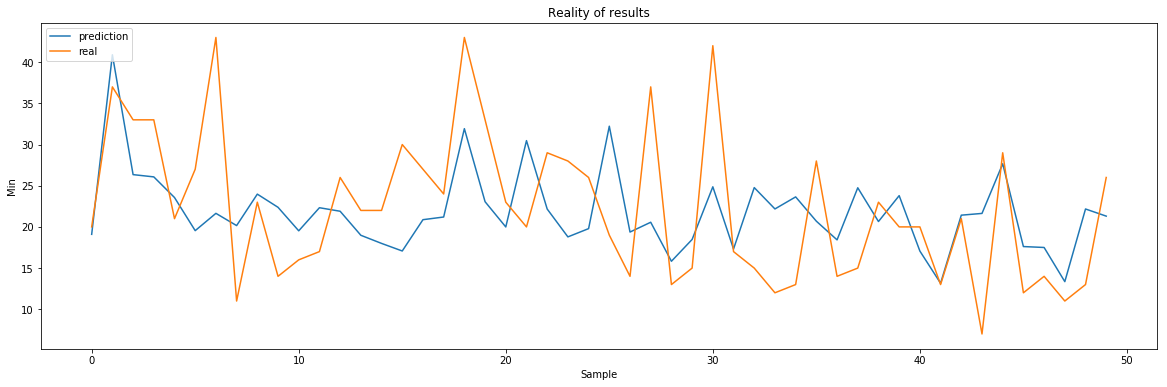

In [201]:
plt.figure(figsize=(20,6))
plt.plot(m13.predict(X[S:E])*90)
plt.plot(y[S:E]*90)
plt.title('Reality of results')
plt.ylabel('Min')
plt.xlabel('Sample')
plt.legend(['prediction', 'real'], loc='upper left')
plt.show()

# Trees

In [194]:
from catboost import CatBoostRegressor

AttributeError: type object '_catboost._FloatArrayWrapper' has no attribute '__reduce_cython__'

In [0]:
def prepare_date_for_trees(df_date):
#     df_date = p['date']
    weekdays_series = df_date.map(lambda x: x.dayofweek)
    time_flat_series = df_date.map(lambda a: (a.hour-10)/10 + a.minute/600)
    date_for_trees = pd.concat([weekdays_series, time_flat_series], axis=1)
    date_for_trees.columns = ['weekday', 'time']
    return date_for_trees

def prepare_for_trees(df):
    date_df = prepare_date_for_trees(df['date'])
    y = p['pickup_time'].values
    df = df.drop(['date', 'pickup_time'], axis=1)
    return pd.concat([df, date_df], axis=1).values, y

In [0]:
X, y = prepare_for_trees(p)

In [0]:
def make(i, d, r, X, y):
    print(d,i,r)
    regr = CatBoostRegressor(iterations=i,
                          learning_rate=r,
                          depth=d, task_type='GPU')
    regr.fit(X, y)
    return regr
# regr_1 = DecisionTreeRegressor(max_depth=2)
# regr_2 = DecisionTreeRegressor(max_depth=5)
# regr_1.fit(X, y)
# regr_2.fit(X, y)

In [0]:
z0, z1 = 1, 30
yy=y[z0:z1]
winner = [30, 0, 0, 0]
results = []

ri = 10
rd = 4
rr = 33 #11

for i in range(1,ri):
    i*=50
    for d in range(1,rd):
        for r in range(1,rr):
            r *= 0.03
            pred = make(i, d, r, X, y).predict(X[z0:z1])
            mse = ((yy-pred)**2).mean()
            result = [mse,i,d,r]
            results.append(result)
            if mse<winner[0]:
                winner = result
            print("mse: {}, i: {}, d: {}, r: {}".format(mse, i, d, r))


print("winner!", winner)

# print("3-", make(3, X, y).predict(np.array([X[z]])))
# print("4-", make(4, X, y).predict(np.array([X[z]])))
# print("5-", make(5, X, y).predict(np.array([X[z]])))
# print("6-", make(6, X, y).predict(np.array([X[z]])))
# print("7-", make(7, X, y).predict(np.array([X[z]])))
# print("8-", make(8, X, y).predict(np.array([X[z]])))
# print("9-", make(9, X, y).predict(np.array([X[z]])))
# print("10-", make(10, X, y).predict(np.array([X[z]])))
# print("11-", make(11, X, y).predict(np.array([X[z]])))
# print("12-", make(12, X, y).predict(np.array([X[z]])))
# print("13-", make(13, X, y).predict(np.array([X[z]])))

# Weather

In [203]:
weather = np.array([14,14,14,14,34,29,29,13,13,13,1,13,29,30,10,14,14,29,29,14,14,17,6,29,34,14,6,14,14,29,29,29,29,29,29,14,14,17,29,14,29,14,2,13,13,13,2,13,14,10,6,29,29,29,29,14,14,14,6,29,14,14,1,13,30,29,28,29,29,2,1,13,13,2,2,29,14,14,6,13,13,13,1,13,13,13,6,14,14,29,29,29,29,13,1,15,29,6,6,14,29,29,29,29,13,1,1,14,15,6,29,29,29,29,29,29,29,29,29,29,29,6,6,14])

low = np.array([0,2,2,1,
-2,-4,-6,-8,
-9,-11,-12,-15,
-12,-2,0,-3,
-5,-6,-6,-7,
-8,-7,-5,-2,0,1,0,-1,-1,0,0,-1,-1,-2,-5,-4,-5,-7,-7,-6,-1,1,0,0,-1,-2,-4,-9,-12,-12,-5,-1,-1,-2,-4,-9,-10,-9,-6,-6,-4,-7,-11,-12,-6,-5,-7,-9,-12,-14,-13,-13,-15,-12,-6,-3,-8,-10,-12,-13,-16,-20,-18,-24,-28,-28,-20,-17,-17,-3,-2,-3,-8,-16,-15,-13,-10,-4,-5,-6,-8,-10,-11,-11,-18,-23,-20,-23,-19,-13,-7,-6,-6,-6,-5,-6,-6,-5,-2,-1,-2,-2,-3,-3])

high = np.array([2,3,3,2,
2,-2,-4,-6,
-7,-9,-9,-12,
-2,0,0,0,
-3,-5,-5,-6,
-7,-6,-2,0,
2,2,2,0,0,1,1,0,-1,-1,-2,-3,-3,-6,-6,-1,1,1,1,1,1,-1,-1,-4,-10,-6,-1,0,-1,-1,-2,-4,-8,-5,-5,-4,-4,-5,-7,-6,-2,-3,-5,-7,-9,-9,-11,-12,-12,-9,-3,-1,-4,-4,-8,-11,-13,-16,-15,-19,-25,-22,-16,-14,-4,-2,0,-1,-3,-8,-13,-10,-5,-3,-3,-5,-7,-8,-9,-10,-11,-16,-14,-17,-14,-7,-6,-6,-5,-5,-5,-5,-5,-2,0,0,-1,-1,-1,-2])

In [248]:
def make_weather(weather, high, low):
    hi = high.reshape((31,4))[:,2:]
    lo = low.reshape((31,4))[:,2:]
    hi = hi.reshape([62])
    lo = lo.reshape([62])
    hilo = np.stack([hi,lo], axis=1)
    
    hilo_scaler = MinMaxScaler()
    hilo_scaled = hilo_scaler.fit_transform(hilo)
    hilo_scaled_df = pd.DataFrame(hilo_scaled, columns=['hi', 'lo'])
    
    weather_1 = weather.reshape((31,4))[:,2:].reshape([62])
    
    return pd.concat([pd.get_dummies(weather_1), hilo_scaled_df],axis=1)

In [272]:
def prep_gps(p, l):
    lalo = l.iloc[:,2:0:-1]
    s = MinMaxScaler()
    s.fit_transform(lalo)

    lats, longs = [], []
    for r in p.itertuples():
        lats.append(lalo['latitude'][r[1]-1])
        longs.append(lalo['longitude'][r[1]-1])

    p['latitude'] = lats
    p['longitude'] = longs

    return s.transform(p.iloc[:,3:])

def prepare_date_for_nn(df_date):
    weekdays_one_hot_df = pd.get_dummies(df_date.map(lambda x: x.dayofweek))
    time_flat_series = df_date.map(lambda a: (a.hour-10)/10 + a.minute/600)
    made_weather = make_weather(weather, high, low)
    weather_df = []
    for time in df_date:
        evening = 0
        if time.hour < 15:
            evening = 1
        w = (time.day - 1)*2 + evening
        weather_df.append(made_weather.iloc[w])
        
    
    weekdays_one_hot_df['time'] = time_flat_series
    return weekdays_one_hot_df, pd.DataFrame(np.array(weather_df))
  
def prepare_for_nn(df):
    dates, weather_df = prepare_date_for_nn(df['date'])
    places_dummies = pd.get_dummies(df['location_id'])
    t_la_lo = prep_gps(df, l)
    
    return pd.concat([dates, places_dummies, pd.DataFrame(t_la_lo), weather_df], axis=1).values, (df['pickup_time']/90).values

X, y = prepare_for_nn(p)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

/home/daniil/miniconda3/envs/ml/lib/python3.6/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


In [275]:
m4, h4, p4 = make_and_validate(make_nn_model4, X, y)

finished  10
finished  40
finished  100
finished  150


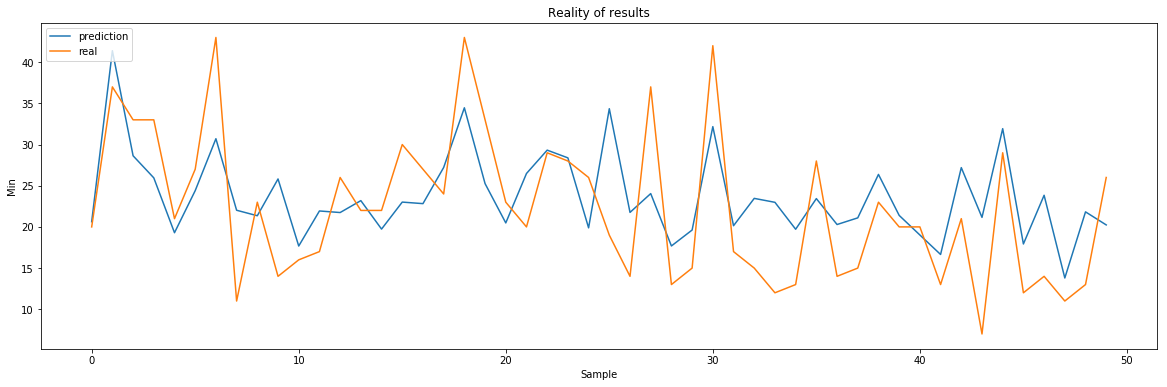

In [276]:
plt.figure(figsize=(20,6))
plt.plot(m4.predict(X[S:E])*90)
plt.plot(y[S:E]*90)
plt.title('Reality of results')
plt.ylabel('Min')
plt.xlabel('Sample')
plt.legend(['prediction', 'real'], loc='upper left')
plt.show()

In [292]:
(m4.predict(X[S:E])*90).shape
# (y[S:E]*90).shape

(50, 1)

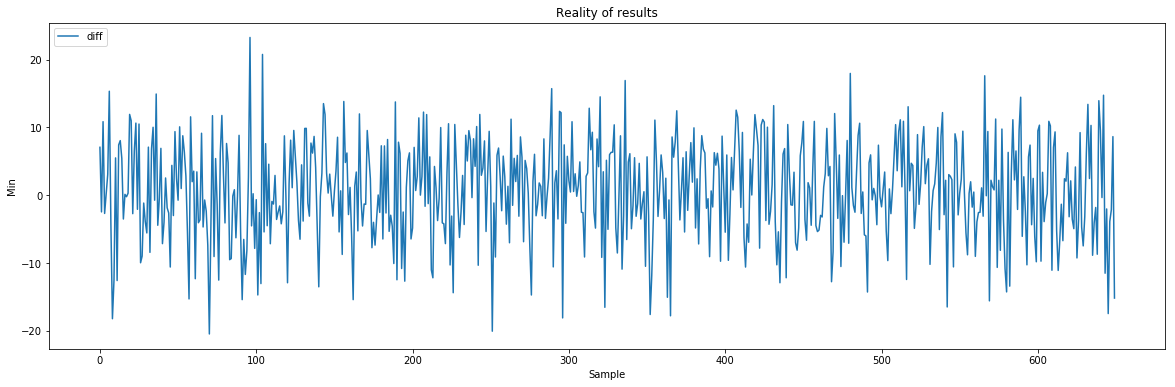

In [297]:
S=100
E=750

plt.figure(figsize=(20,6))
plt.plot((m4.predict(X[S:E])*90).reshape([E-S]) - y[S:E]*90)
plt.title('Reality of results')
plt.ylabel('Min')
plt.xlabel('Sample')
plt.legend(['diff'], loc='upper left')
plt.show()

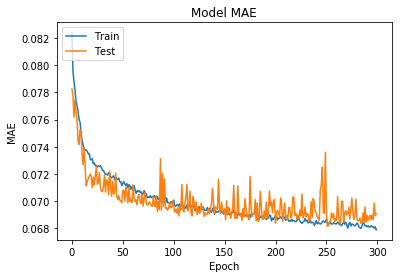

In [278]:
visualize_history_more(h4)

In [306]:
try:
    m4, h4, p4 = make_and_validate(make_nn_model4, X, y,1000)
    m4.save('models/my_model_1000.h5')
except:
    import os
    os.system('shutdown -s')

import os
os.system('shutdown -s')


Train on 52304 samples, validate on 13076 samples
Epoch 1/1000
52304/52304 [==============================] - 4s 67us/step - loss: 0.0108 - mean_squared_error: 0.0108 - mean_absolute_error: 0.0838 - mean_absolute_percentage_error: 44.0387 - cosine_proximity: -1.0000 - val_loss: 0.0091 - val_mean_squared_error: 0.0091 - val_mean_absolute_error: 0.0786 - val_mean_absolute_percentage_error: 43.6169 - val_cosine_proximity: -1.0000
Epoch 2/1000
52304/52304 [==============================] - 1s 25us/step - loss: 0.0097 - mean_squared_error: 0.0097 - mean_absolute_error: 0.0800 - mean_absolute_percentage_error: 42.1931 - cosine_proximity: -1.0000 - val_loss: 0.0089 - val_mean_squared_error: 0.0089 - val_mean_absolute_error: 0.0771 - val_mean_absolute_percentage_error: 41.3845 - val_cosine_proximity: -1.0000
Epoch 3/1000
52304/52304 [==============================] - 1s 26us/step - loss: 0.0094 - mean_squared_error: 0.0094 - mean_absolute_error: 0.0790 - mean_absolute_percentage_error: 41.7865

52304/52304 [==============================] - 1s 23us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0718 - mean_absolute_percentage_error: 36.9193 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0710 - val_mean_absolute_percentage_error: 35.2301 - val_cosine_proximity: -1.0000
Epoch 44/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0716 - mean_absolute_percentage_error: 36.8946 - cosine_proximity: -1.0000 - val_loss: 0.0078 - val_mean_squared_error: 0.0078 - val_mean_absolute_error: 0.0709 - val_mean_absolute_percentage_error: 34.4462 - val_cosine_proximity: -1.0000
Epoch 45/1000
52304/52304 [==============================] - 1s 23us/step - loss: 0.0079 - mean_squared_error: 0.0079 - mean_absolute_error: 0.0720 - mean_absolute_percentage_error: 37.0010 - cosine_proximity: -1.0000 - val_loss: 0.0077 - val_mean_sq

52304/52304 [==============================] - 1s 23us/step - loss: 0.0075 - mean_squared_error: 0.0075 - mean_absolute_error: 0.0702 - mean_absolute_percentage_error: 35.9062 - cosine_proximity: -1.0000 - val_loss: 0.0076 - val_mean_squared_error: 0.0076 - val_mean_absolute_error: 0.0700 - val_mean_absolute_percentage_error: 34.0139 - val_cosine_proximity: -1.0000
Epoch 86/1000
52304/52304 [==============================] - 1s 23us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0704 - mean_absolute_percentage_error: 35.9120 - cosine_proximity: -1.0000 - val_loss: 0.0075 - val_mean_squared_error: 0.0075 - val_mean_absolute_error: 0.0696 - val_mean_absolute_percentage_error: 34.2236 - val_cosine_proximity: -1.0000
Epoch 87/1000
52304/52304 [==============================] - 1s 23us/step - loss: 0.0076 - mean_squared_error: 0.0076 - mean_absolute_error: 0.0703 - mean_absolute_percentage_error: 35.9007 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_sq

52304/52304 [==============================] - 1s 23us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0692 - mean_absolute_percentage_error: 35.3123 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0693 - val_mean_absolute_percentage_error: 34.4052 - val_cosine_proximity: -1.0000
Epoch 128/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0691 - mean_absolute_percentage_error: 35.2252 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0691 - val_mean_absolute_percentage_error: 34.7929 - val_cosine_proximity: -1.0000
Epoch 129/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0693 - mean_absolute_percentage_error: 35.3168 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0073 - mean_squared_error: 0.0073 - mean_absolute_error: 0.0689 - mean_absolute_percentage_error: 34.9599 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0688 - val_mean_absolute_percentage_error: 34.4523 - val_cosine_proximity: -1.0000
Epoch 170/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0687 - mean_absolute_percentage_error: 34.9395 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0690 - val_mean_absolute_percentage_error: 33.6302 - val_cosine_proximity: -1.0000
Epoch 171/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0688 - mean_absolute_percentage_error: 34.9605 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0685 - mean_absolute_percentage_error: 34.7557 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 34.8493 - val_cosine_proximity: -1.0000
Epoch 212/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 34.7131 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 34.1855 - val_cosine_proximity: -1.0000
Epoch 213/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0072 - mean_squared_error: 0.0072 - mean_absolute_error: 0.0684 - mean_absolute_percentage_error: 34.7447 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 34.3504 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 34.5538 - val_cosine_proximity: -1.0000
Epoch 254/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 34.3825 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 33.9148 - val_cosine_proximity: -1.0000
Epoch 255/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0071 - mean_squared_error: 0.0071 - mean_absolute_error: 0.0679 - mean_absolute_percentage_error: 34.3500 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 34.2884 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 36.2177 - val_cosine_proximity: -1.0000
Epoch 296/1000
52304/52304 [==============================] - 1s 23us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0678 - mean_absolute_percentage_error: 34.3017 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0694 - val_mean_absolute_percentage_error: 35.4290 - val_cosine_proximity: -1.0000
Epoch 297/1000
52304/52304 [==============================] - 1s 23us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0677 - mean_absolute_percentage_error: 34.2984 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 34.1728 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 35.3558 - val_cosine_proximity: -1.0000
Epoch 338/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 34.0834 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0684 - val_mean_absolute_percentage_error: 34.7563 - val_cosine_proximity: -1.0000
Epoch 339/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0674 - mean_absolute_percentage_error: 34.0484 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 34.0697 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 32.8651 - val_cosine_proximity: -1.0000
Epoch 380/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0070 - mean_squared_error: 0.0070 - mean_absolute_error: 0.0675 - mean_absolute_percentage_error: 34.1200 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0690 - val_mean_absolute_percentage_error: 35.6521 - val_cosine_proximity: -1.0000
Epoch 381/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 34.0642 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_

52304/52304 [==============================] - 1s 25us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 33.9769 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0682 - val_mean_absolute_percentage_error: 34.4562 - val_cosine_proximity: -1.0000
Epoch 422/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 33.8088 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 35.6924 - val_cosine_proximity: -1.0000
Epoch 423/1000
52304/52304 [==============================] - 1s 25us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0673 - mean_absolute_percentage_error: 34.0085 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 33.8020 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0690 - val_mean_absolute_percentage_error: 35.8663 - val_cosine_proximity: -1.0000
Epoch 464/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 33.7323 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 34.1816 - val_cosine_proximity: -1.0000
Epoch 465/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0670 - mean_absolute_percentage_error: 33.8387 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_

52304/52304 [==============================] - 1s 23us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 33.8056 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 32.8225 - val_cosine_proximity: -1.0000
Epoch 506/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 33.7448 - cosine_proximity: -1.0000 - val_loss: 0.0070 - val_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0678 - val_mean_absolute_percentage_error: 33.4452 - val_cosine_proximity: -1.0000
Epoch 507/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 33.7815 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0069 - mean_squared_error: 0.0069 - mean_absolute_error: 0.0669 - mean_absolute_percentage_error: 33.7611 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 35.0027 - val_cosine_proximity: -1.0000
Epoch 548/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 33.6898 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 34.0806 - val_cosine_proximity: -1.0000
Epoch 549/1000
52304/52304 [==============================] - 1s 23us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 33.6333 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_

52304/52304 [==============================] - 1s 25us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0667 - mean_absolute_percentage_error: 33.6093 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0689 - val_mean_absolute_percentage_error: 35.1541 - val_cosine_proximity: -1.0000
Epoch 590/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0668 - mean_absolute_percentage_error: 33.5556 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0684 - val_mean_absolute_percentage_error: 35.4026 - val_cosine_proximity: -1.0000
Epoch 591/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 33.6077 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 33.5536 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 35.0012 - val_cosine_proximity: -1.0000
Epoch 632/1000
52304/52304 [==============================] - 1s 23us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 33.5304 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 35.2460 - val_cosine_proximity: -1.0000
Epoch 633/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 33.5021 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 33.5652 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 34.5511 - val_cosine_proximity: -1.0000
Epoch 674/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0666 - mean_absolute_percentage_error: 33.5529 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 35.6123 - val_cosine_proximity: -1.0000
Epoch 675/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 33.4338 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 33.3986 - cosine_proximity: -1.0000 - val_loss: 0.0070 - val_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0682 - val_mean_absolute_percentage_error: 35.0728 - val_cosine_proximity: -1.0000
Epoch 716/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 33.5416 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_squared_error: 0.0073 - val_mean_absolute_error: 0.0692 - val_mean_absolute_percentage_error: 35.3120 - val_cosine_proximity: -1.0000
Epoch 717/1000
52304/52304 [==============================] - 1s 23us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 33.4708 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 33.4413 - cosine_proximity: -1.0000 - val_loss: 0.0070 - val_mean_squared_error: 0.0070 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 35.6744 - val_cosine_proximity: -1.0000
Epoch 758/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 33.4054 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 35.0853 - val_cosine_proximity: -1.0000
Epoch 759/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0068 - mean_squared_error: 0.0068 - mean_absolute_error: 0.0665 - mean_absolute_percentage_error: 33.4990 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 33.4586 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0680 - val_mean_absolute_percentage_error: 33.4533 - val_cosine_proximity: -1.0000
Epoch 800/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 33.2702 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 35.1949 - val_cosine_proximity: -1.0000
Epoch 801/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0664 - mean_absolute_percentage_error: 33.4068 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 33.3506 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0682 - val_mean_absolute_percentage_error: 34.2985 - val_cosine_proximity: -1.0000
Epoch 842/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 33.2456 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0687 - val_mean_absolute_percentage_error: 35.4908 - val_cosine_proximity: -1.0000
Epoch 843/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 33.3769 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 33.3922 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_squared_error: 0.0074 - val_mean_absolute_error: 0.0695 - val_mean_absolute_percentage_error: 35.0633 - val_cosine_proximity: -1.0000
Epoch 884/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 33.2379 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 34.3233 - val_cosine_proximity: -1.0000
Epoch 885/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 33.3510 - cosine_proximity: -1.0000 - val_loss: 0.0074 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0662 - mean_absolute_percentage_error: 33.2949 - cosine_proximity: -1.0000 - val_loss: 0.0072 - val_mean_squared_error: 0.0072 - val_mean_absolute_error: 0.0686 - val_mean_absolute_percentage_error: 34.0347 - val_cosine_proximity: -1.0000
Epoch 926/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0660 - mean_absolute_percentage_error: 33.2340 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0684 - val_mean_absolute_percentage_error: 34.5268 - val_cosine_proximity: -1.0000
Epoch 927/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 33.2465 - cosine_proximity: -1.0000 - val_loss: 0.0073 - val_mean_

52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0661 - mean_absolute_percentage_error: 33.2511 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0685 - val_mean_absolute_percentage_error: 34.2334 - val_cosine_proximity: -1.0000
Epoch 968/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 33.3473 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_squared_error: 0.0071 - val_mean_absolute_error: 0.0683 - val_mean_absolute_percentage_error: 35.3320 - val_cosine_proximity: -1.0000
Epoch 969/1000
52304/52304 [==============================] - 1s 24us/step - loss: 0.0067 - mean_squared_error: 0.0067 - mean_absolute_error: 0.0663 - mean_absolute_percentage_error: 33.3452 - cosine_proximity: -1.0000 - val_loss: 0.0071 - val_mean_

256

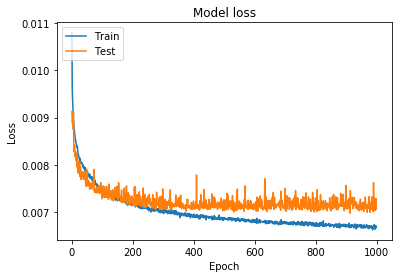

In [307]:
visualize_history_more(h4)